### Authored By Amirul Uzair

# Load Dependencies

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Import Dataset

In [4]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\Bank_Personal_Loan_Modelling.xlsx"

# Load the specific sheet 'Data'
try:
    df = pd.read_excel(file_path, sheet_name='Data')  # Load the 'Data' sheet
    print("Sheet 'Data' successfully loaded!")
    print(df.head())  # Display the first few rows of the dataframe
except FileNotFoundError:
    print("Error: The specified file was not found. Please check the file path.")
except ValueError:
    print("Error: The specified sheet name does not exist. Please check the sheet name.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Sheet 'Data' successfully loaded!
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [5]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Exploring Dataset

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Drop Unnecessary Column

In [12]:
#Drop ID column as redundant
df = df.drop(columns = 'ID')
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Check Data Info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


## Checking Unique Values for Each Attributes

In [16]:
#Checking Unique Values for Each Attributes

# Get the count of unique values for each column
unique_values_count = df.nunique()

# Display the result
print("Total unique values in each column:")
print(unique_values_count)


Total unique values in each column:
Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


## Converting Ordinal Numerical Data to Categorical for Analysis

In [17]:
# Convert Education Column to its Categorical Data
# 1: Undergrad; 2: Graduate; 3: Advanced/Professional

# Define the mapping for Education categories
education_mapping = {
    1: 'Undergrad',
    2: 'Graduate',
    3: 'Advanced/Professional'
}

# Map the values in the Education column
df['Education'] = df['Education'].map(education_mapping)

# Display the updated DataFrame to verify the changes
print("The 'Education' column has been successfully converted to categorical data:")
df  # Displaying only the 'Education' column for verification

The 'Education' column has been successfully converted to categorical data:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,Advanced/Professional,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,Undergrad,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,Advanced/Professional,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,Graduate,0,0,0,0,1,0


## Move Target Label to Most Right Position

In [18]:
# Move the 'Personal Loan' column to the far right
columns = [col for col in df.columns if col != 'Personal Loan'] + ['Personal Loan']
df = df[columns]

# Display the first few rows to verify the change
print("The 'Personal Loan' column has been moved to the far right:")
df

The 'Personal Loan' column has been moved to the far right:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,Undergrad,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,Advanced/Professional,0,0,0,1,0,0
4996,30,4,15,92037,4,0.4,Undergrad,85,0,0,1,0,0
4997,63,39,24,93023,2,0.3,Advanced/Professional,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,Graduate,0,0,0,1,0,0


# Univariate Analysis

## Statistical Analysis

In [19]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Measurement of Central Tendency 

In [20]:
# Select column
columns_to_analyze = df.columns[:-1]

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937913
Mortgage                 56.498800
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

Median values for features:
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Mortgage                  0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

Mode values for features:
Age                          35
Experience                   32
Income                       44
ZIP Code                  94720
Family                        1
CCAvg        

C:\Users\amiru\AppData\Local\Temp\ipykernel_19744\3973919483.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df[columns_to_analyze].mean()
C:\Users\amiru\AppData\Local\Temp\ipykernel_19744\3973919483.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df[columns_to_analyze].median()


## Measures of Variability

In [21]:
# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[numerical_columns].std()
variance_values = df[numerical_columns].var()
range_values = df[numerical_columns].max() - df[numerical_columns].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747666
Mortgage               101.713802
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
Personal Loan            0.294621
dtype: float64

Variance values for numerical features:
Age                   1.314042e+02
Experience            1.315140e+02
Income                2.119104e+03
ZIP Code              4.502257e+06
Family                1.317130e+00
CCAvg                 3.054337e+00
Mortgage              1.034570e+04
Securities Account    9.351934e-02
CD Account            5.676319e-02
Online                2.406779e-01
CreditCard            2.076055e-01
Personal Loan         8.680136e-02
dtype: float64

Range values for numerical features:
Age          

## Feature Distribution

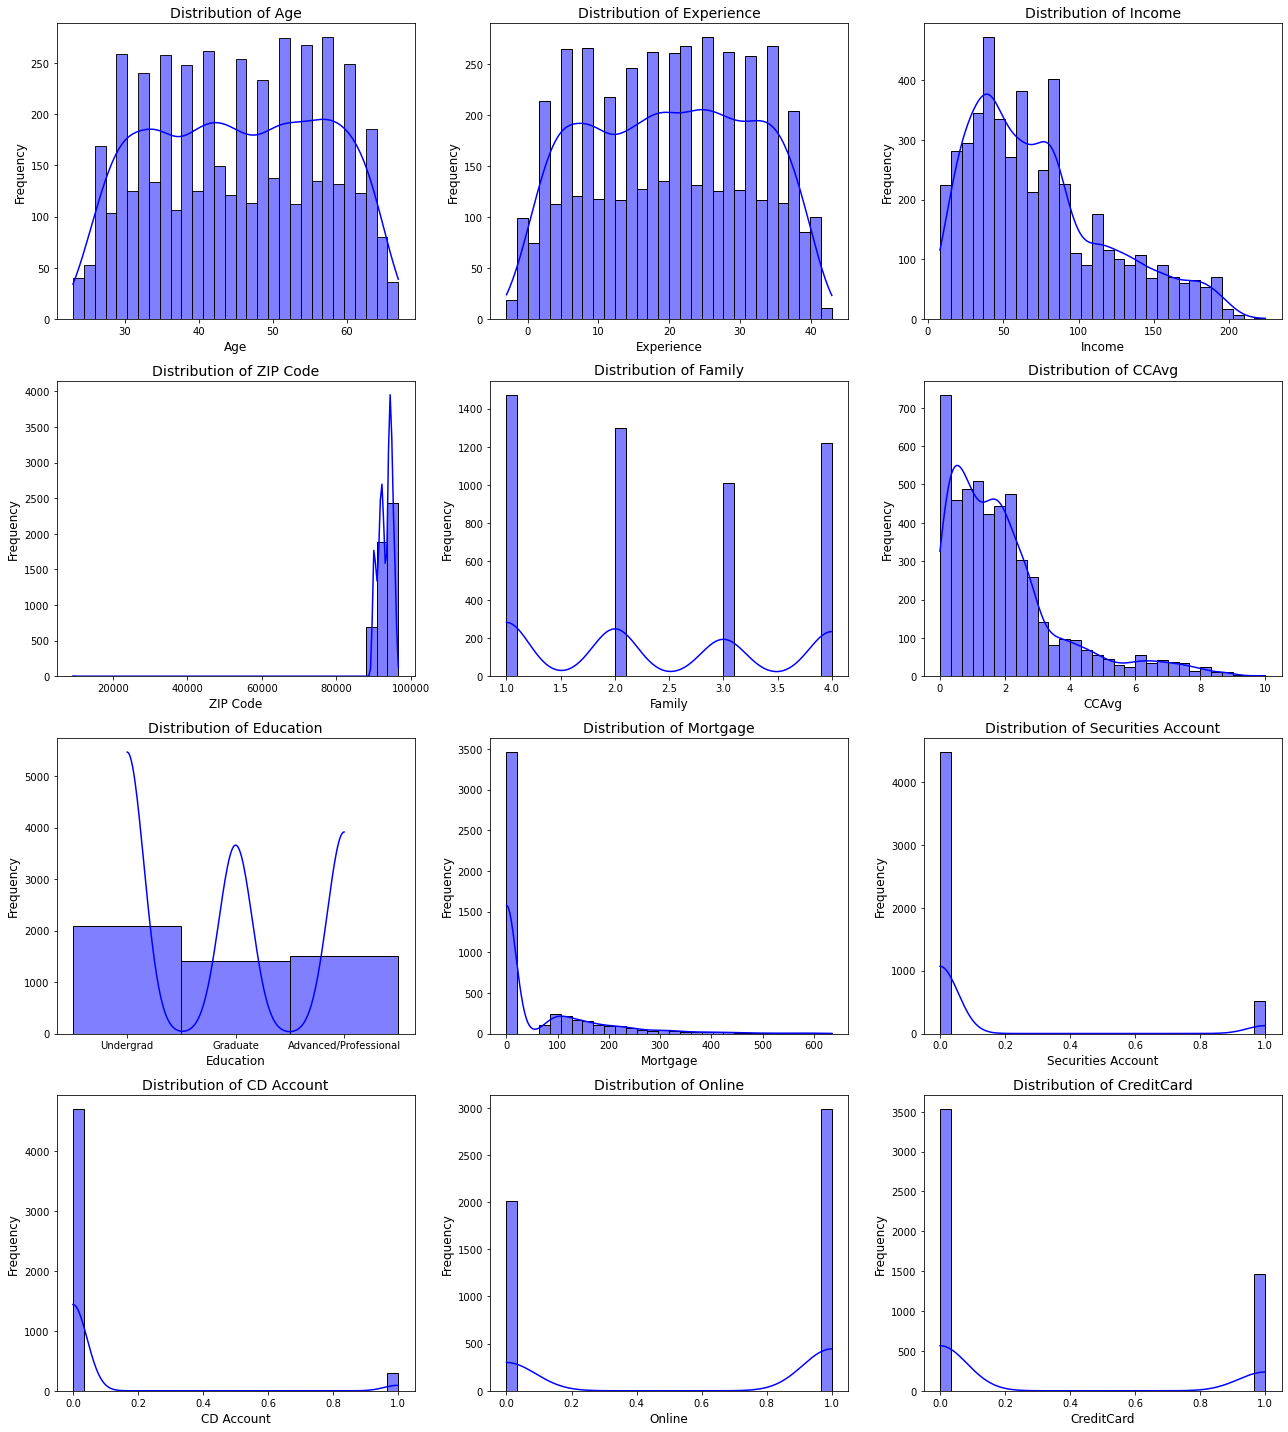

In [25]:
import seaborn as sns

df_features = df.iloc[:, :-1]

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Class Distribution

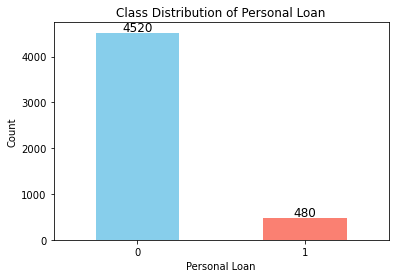

In [31]:
# Plot the value counts for 'Personal Loan'
ax = df['Personal Loan'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Display value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Class Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Multivariate Analysis

## Feature Relationship with Class

### Box Plot

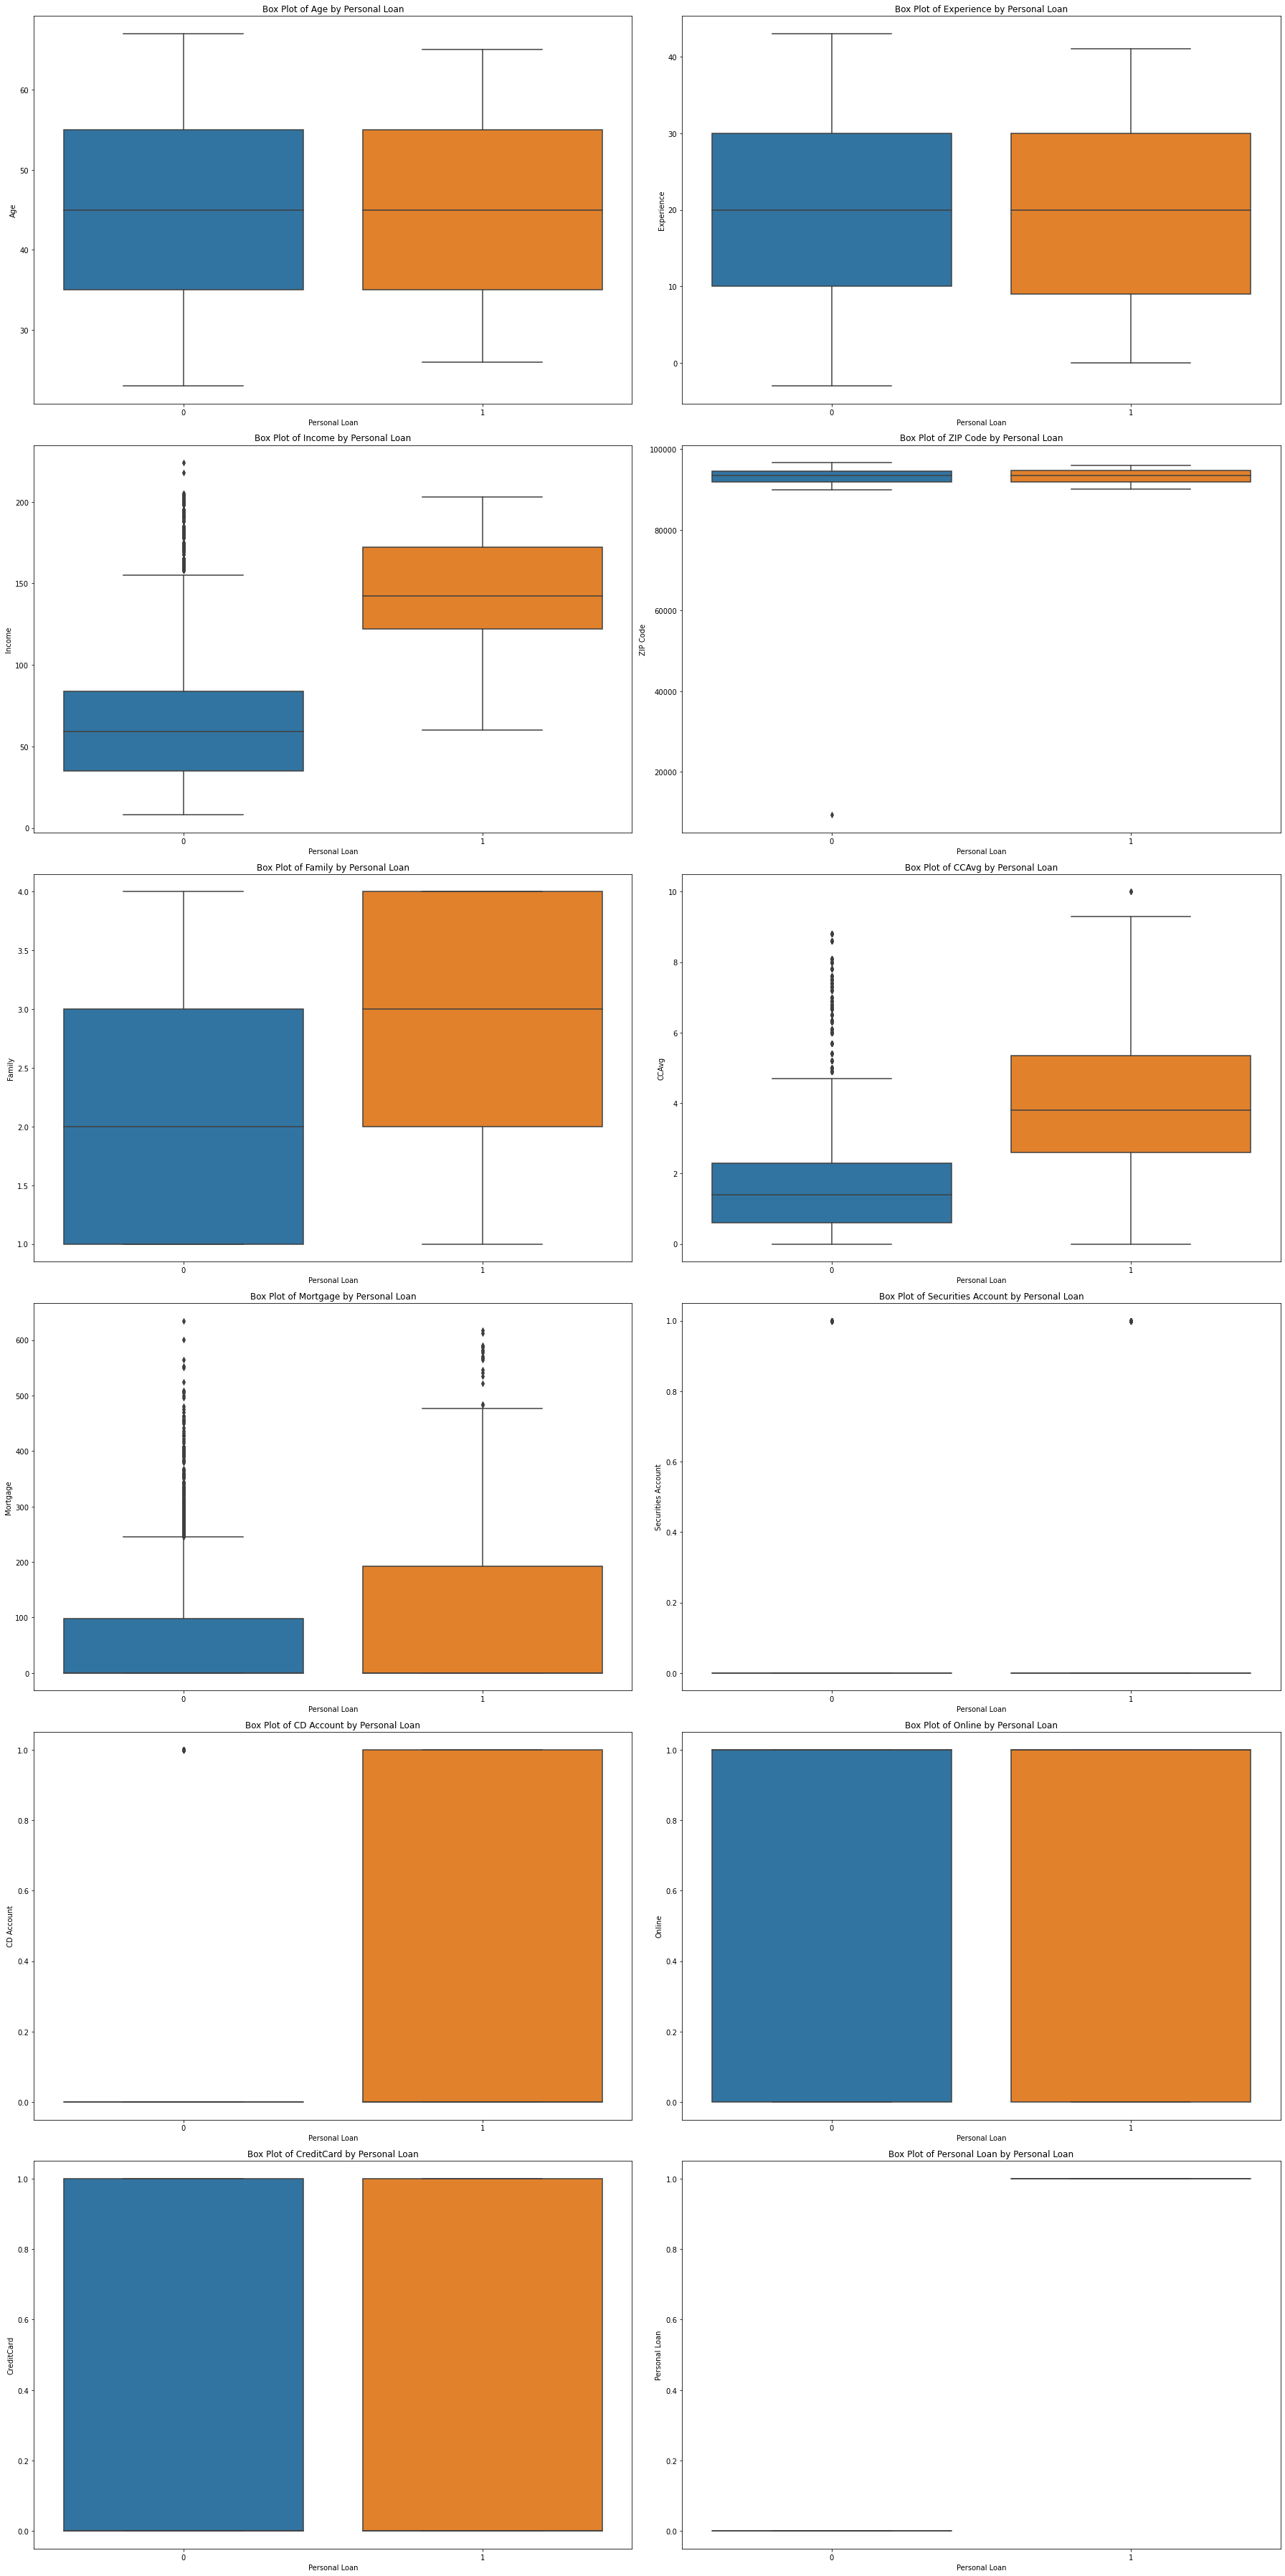

In [36]:
# Plotting boxplots for all numeric features 
plt.figure(figsize=(25, 50))
numeric_features = df.select_dtypes(include='number').columns

for i, feature in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i)
    sns.boxplot(data=df, x="Personal Loan", y=feature)
    plt.title(f'Box Plot of {feature} by Personal Loan')
    plt.xlabel('Personal Loan')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Histogram

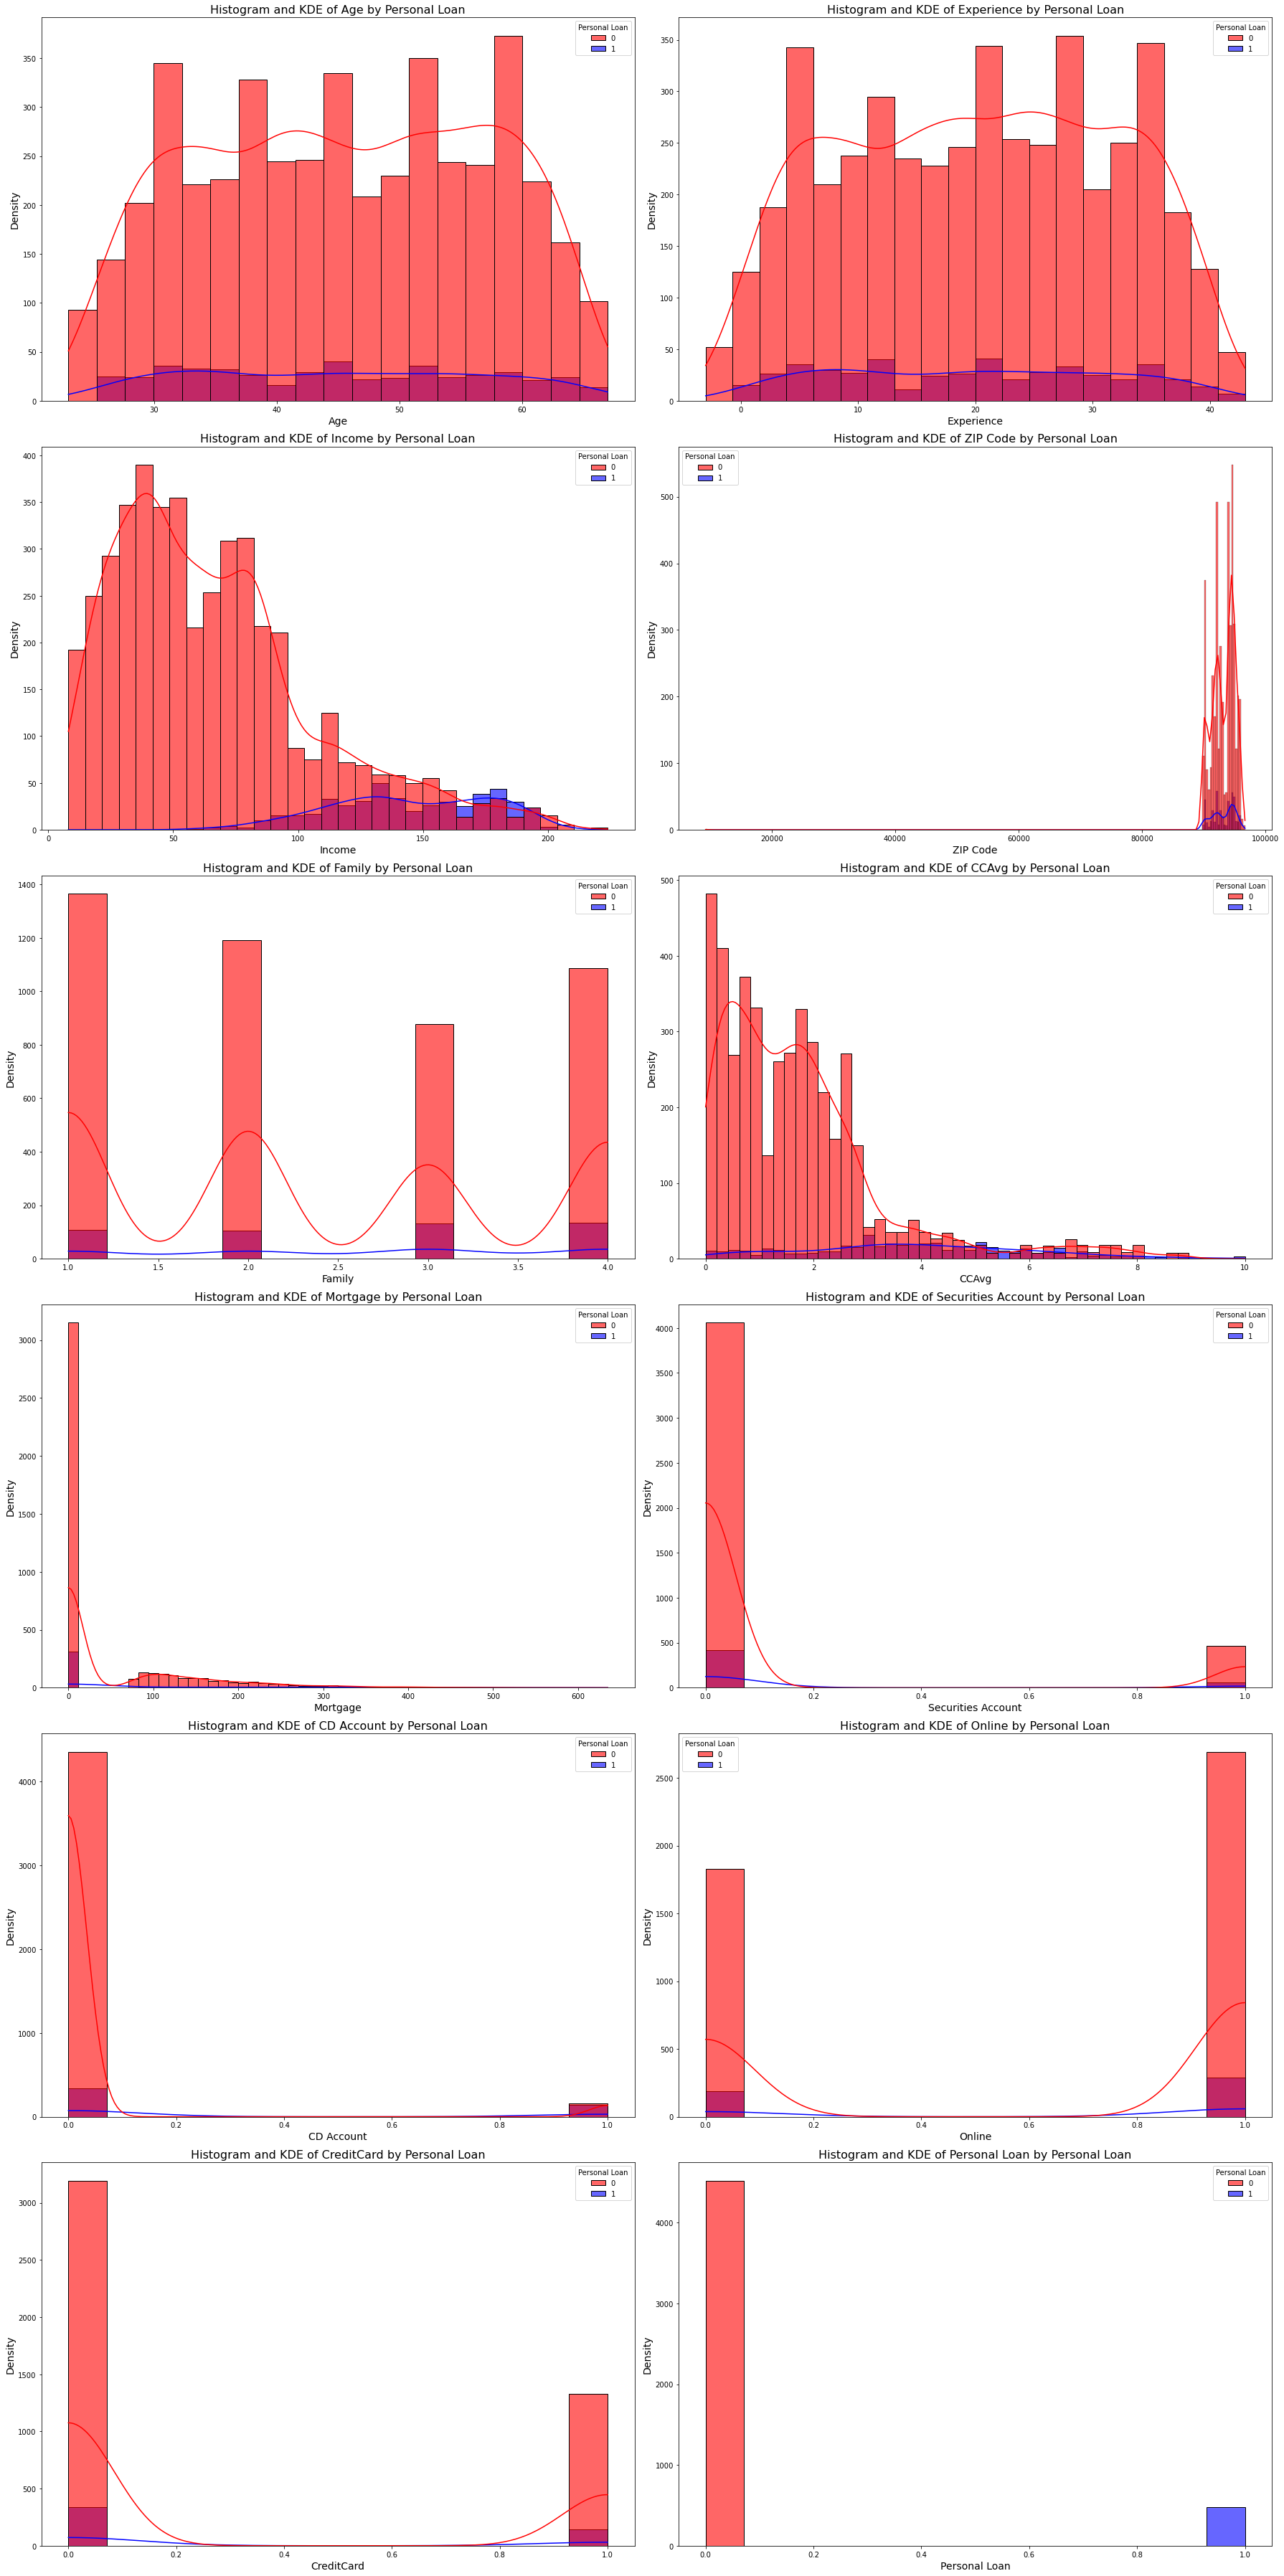

In [40]:
# Plotting histograms with KDE for all numeric features
plt.figure(figsize=(25, 50))
numeric_features = df.select_dtypes(include='number').columns

for i, feature in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i)
    sns.histplot(data=df, x=feature, hue="Personal Loan", kde=True, palette={0: "red", 1: "blue"}, alpha=0.6)
    plt.title(f'Histogram and KDE of {feature} by Personal Loan', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

### Scatter Plot

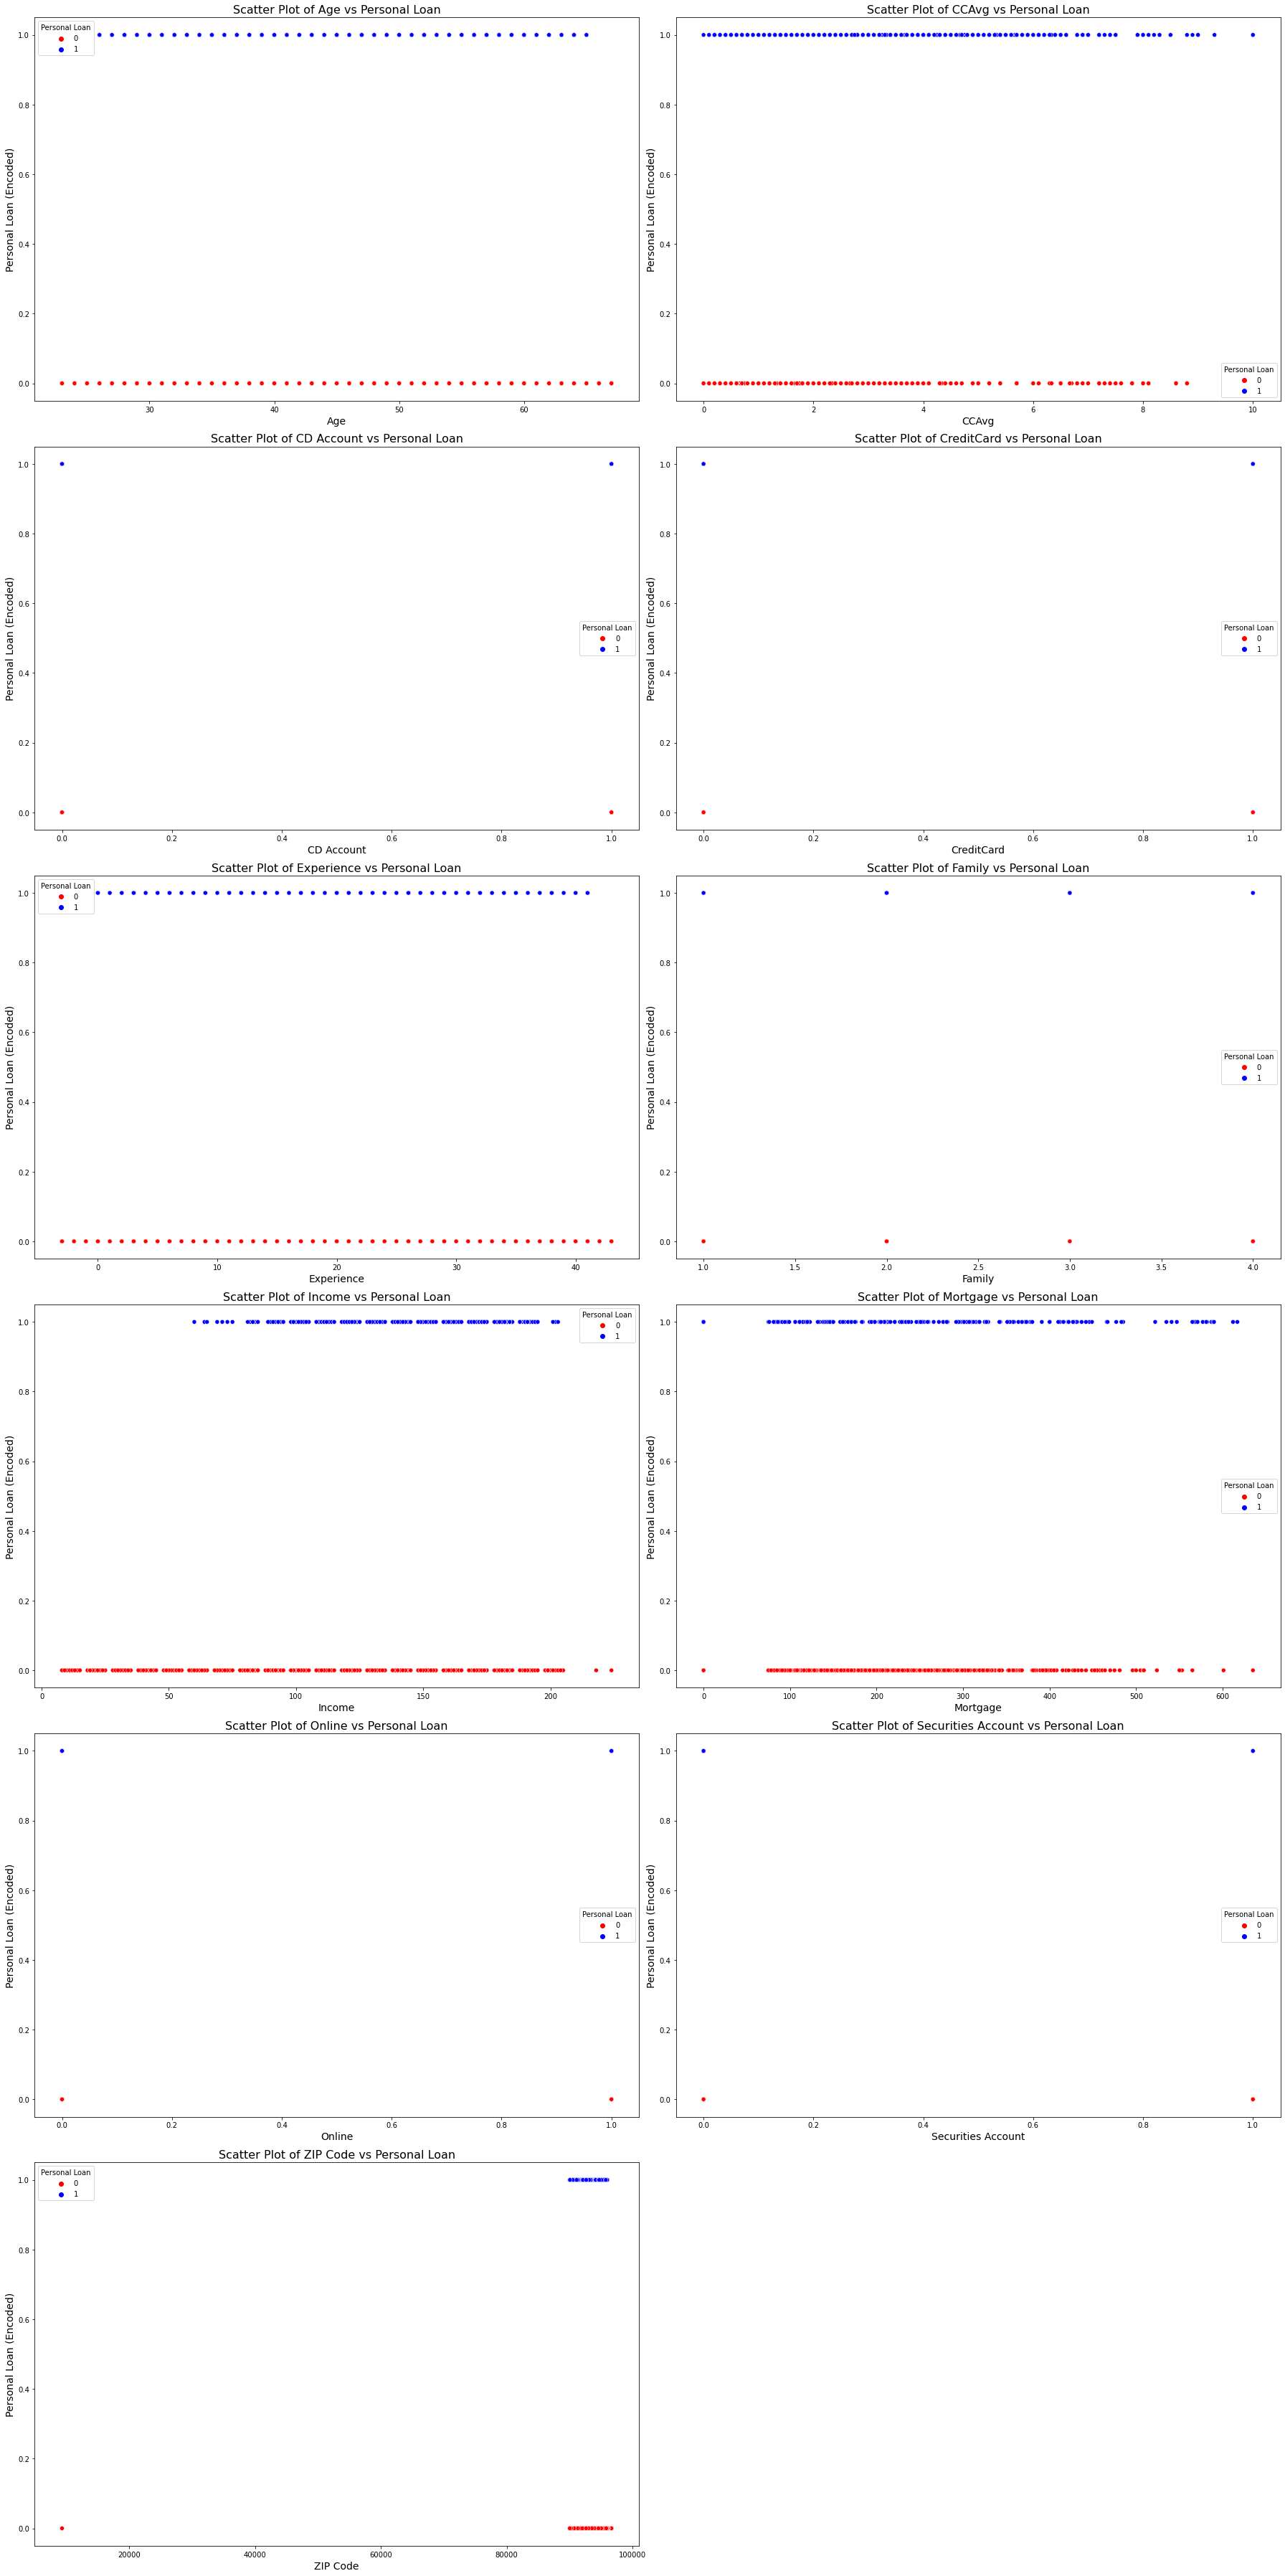

In [42]:
##### Plotting scatter plots for all numeric features 
plt.figure(figsize=(25, 50))
numeric_features = df.select_dtypes(include='number').columns.difference(["Personal Loan"])

for i, feature in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i)
    sns.scatterplot(data=df, x=feature, y="Personal Loan", hue="Personal Loan", palette={0: "red", 1: "blue"})
    plt.title(f'Scatter Plot of {feature} vs Personal Loan', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Personal Loan (Encoded)', fontsize=14)

plt.tight_layout()
plt.show()

### Pie Chart

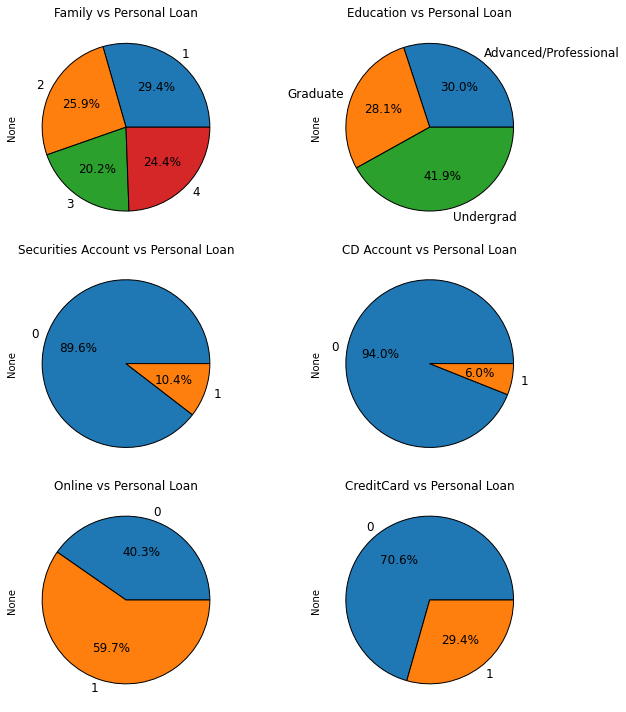

In [58]:
# List of columns to exclude
exclude_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']

# Filter out the columns to exclude
features_to_plot = [col for col in df.columns[:-1] if col not in exclude_columns]

# Create a larger figure size
fig, axes = plt.subplots(nrows=(len(features_to_plot) + 1) // 2, ncols=2, figsize=(15, 8))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Loop through each feature to create pie charts
for i, feature in enumerate(features_to_plot):
    # Count the values of the feature and group by 'Personal Loan'
    feature_counts = df.groupby([feature, 'Personal Loan']).size().unstack().fillna(0)
    
    # Flatten the feature_counts to get pie chart data for each Personal Loan category
    feature_counts = feature_counts.sum(axis=1)  # Sum across the 'Personal Loan' categories
    
    # Plot pie chart
    feature_counts.plot(kind='pie', autopct='%1.1f%%', legend=False, 
                        title=f'{feature} vs Personal Loan', ax=axes[i], 
                        wedgeprops={'edgecolor': 'black'}, fontsize=12, 
                        figsize=(10, 10))

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make it neat and display the plot
plt.tight_layout()
plt.show()

# Checking for Outliers

## Convert Back Categorical Data to Numerical using Label Encoding

In [59]:
# Define the reverse mapping for Education categories
education_reverse_mapping = {
    'Undergrad': 1,
    'Graduate': 2,
    'Advanced/Professional': 3
}

# Map the values in the Education column back to numerical values
df['Education'] = df['Education'].map(education_reverse_mapping)

# Display the updated DataFrame to verify the changes
print("The 'Education' column has been successfully converted back to numerical data:")
df[['Education']]  # Displaying only the 'Education' column for verification

The 'Education' column has been successfully converted back to numerical data:


,Education
0,1
1,1
2,1
3,2
4,2
...,...
4995,3
4996,1
4997,3
4998,2


In [60]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


## Boxplot Visualization

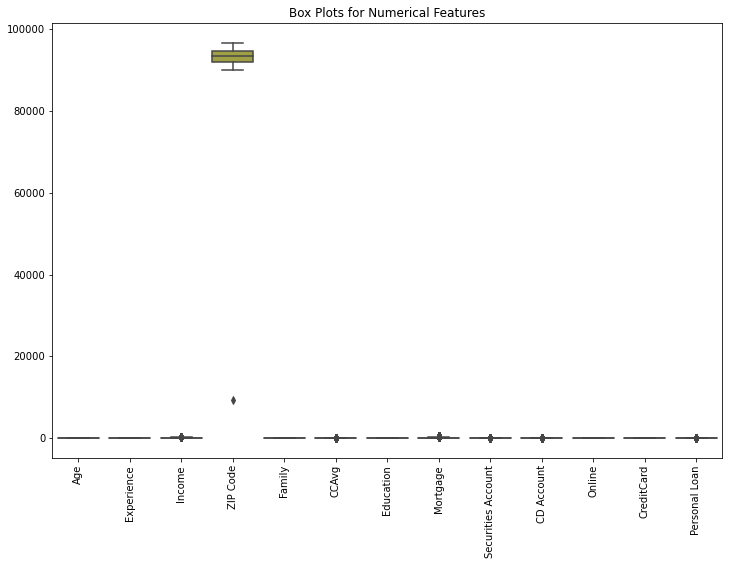

In [61]:
import seaborn as sns

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Verify Outliers Using IQR

In [62]:
# Loop through all columns except target label
for column in df.columns:
    if column != 'Personal Loan':
        # Calculate Q1, Q3, and IQR for each column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check for outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Print if no outliers are found for the column
        if outliers.empty:
            print(f"No outliers detected in {column}")
        else:
            print(f"Outliers detected in {column}:")
            print(outliers[[column]])

No outliers detected in Age
No outliers detected in Experience
Outliers detected in Income:
      Income
18       193
47       194
53       190
59       188
303      195
...      ...
4659     199
4670     194
4895     201
4981     195
4993     218

[96 rows x 1 columns]
Outliers detected in ZIP Code:
     ZIP Code
384      9307
No outliers detected in Family
Outliers detected in CCAvg:
         CCAvg
9     8.900000
18    8.100000
44    5.700000
55    8.000000
61    5.700000
...        ...
4908  6.100000
4911  7.500000
4937  8.600000
4980  5.300000
4993  6.666667

[324 rows x 1 columns]
No outliers detected in Education
Outliers detected in Mortgage:
      Mortgage
22         260
39         285
42         412
59         455
66         336
...        ...
4859       541
4865       342
4899       299
4942       308
4963       306

[291 rows x 1 columns]
Outliers detected in Securities Account:
      Securities Account
0                      1
1                      1
12                    

## Handle Outliers using IQR

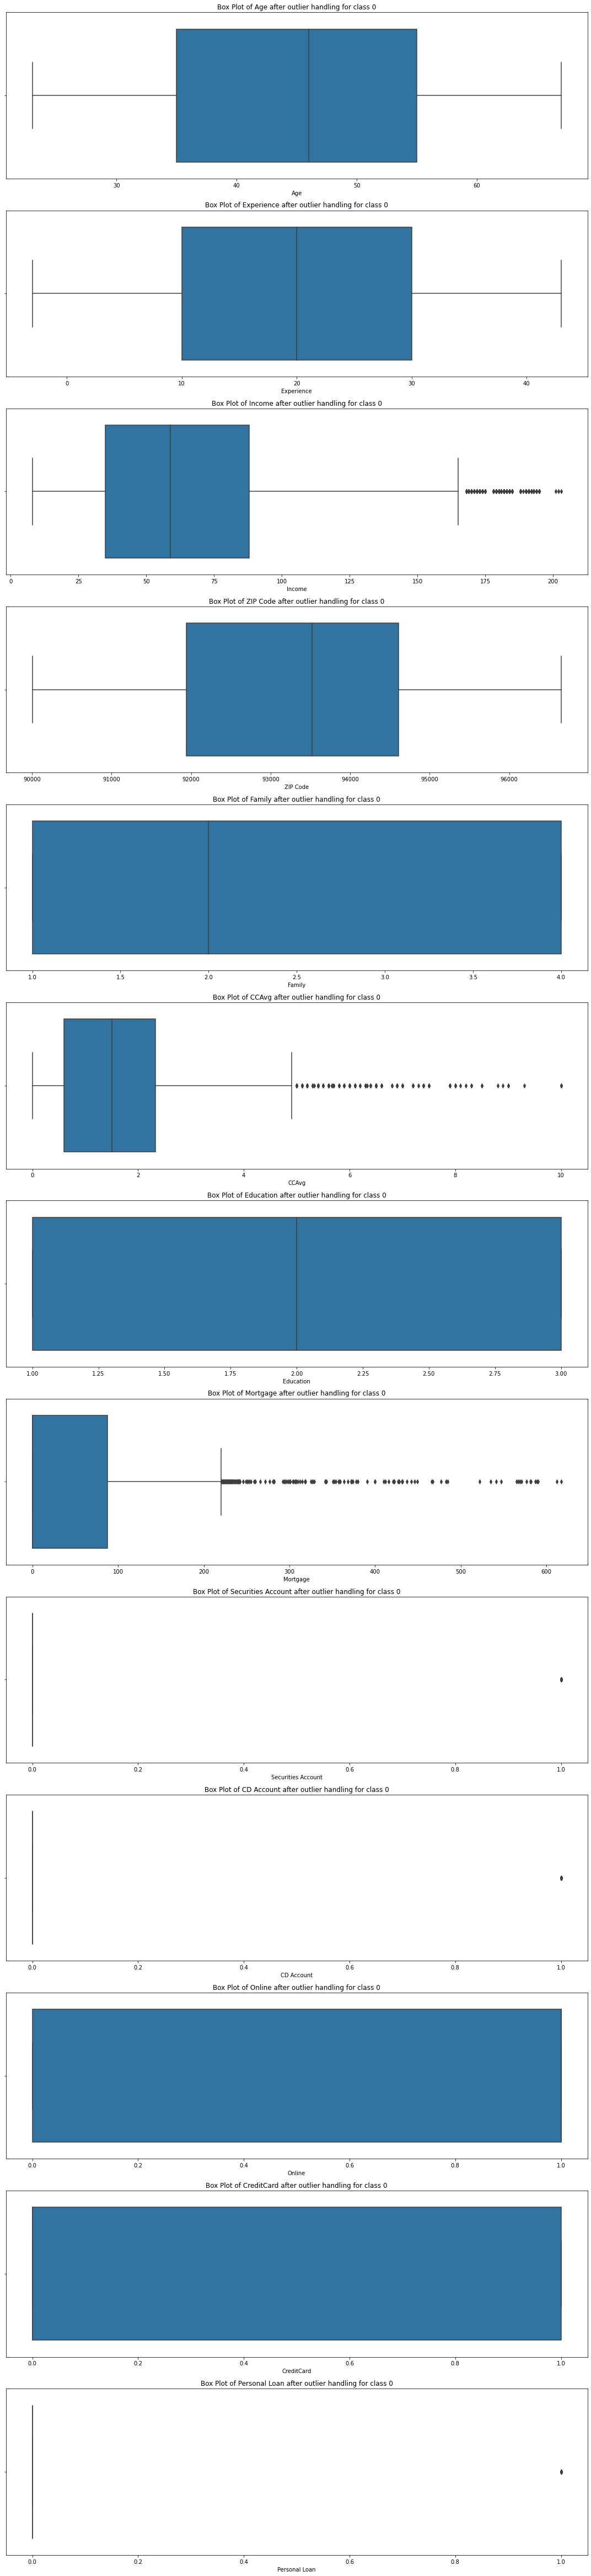

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to handle outliers using the IQR method for class '0'
def handle_outliers_iqr_class_0(data, column, factor=1.5, class_column='Personal Loan'):
    # Filter data for class '0'
    class_0_data = data[data[class_column] == 0]  # Ensure you're using 0 for class '0'
    
    # Apply the IQR outlier handling only to class '0'
    Q1 = class_0_data[column].quantile(0.25)
    Q3 = class_0_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Remove outliers for class '0'
    class_0_data = class_0_data[(class_0_data[column] >= lower_bound) & (class_0_data[column] <= upper_bound)]
    
    # Merge the cleaned class '0' data back with other data (class != '0')
    data_cleaned = pd.concat([data[data[class_column] != 0], class_0_data])
    
    return data_cleaned

# Apply the function to all numeric columns except the last column, and only for class '0'
numeric_columns = df.select_dtypes(include=['number']).columns[:-1]  # Exclude the last column
for column in numeric_columns:
    df = handle_outliers_iqr_class_0(df, column=column)

# Reset the index after removing outliers
df = df.reset_index(drop=True)

# Verify the changes for all numeric columns
plt.figure(figsize=(15, len(df.select_dtypes(include=['number']).columns) * 5))
for i, column in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['number']).columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} after outlier handling for class 0')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Boxplot for Cleaned Data after Handling Outliers

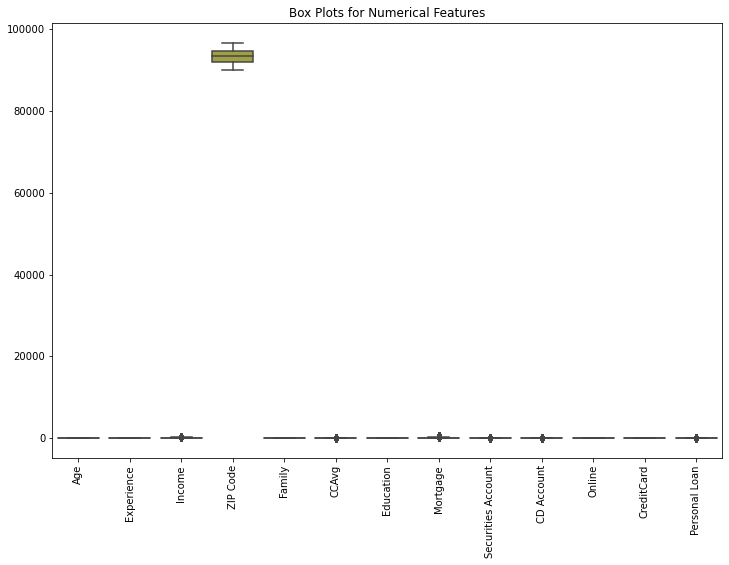

In [65]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Scatter Plot of Cleaned Feature

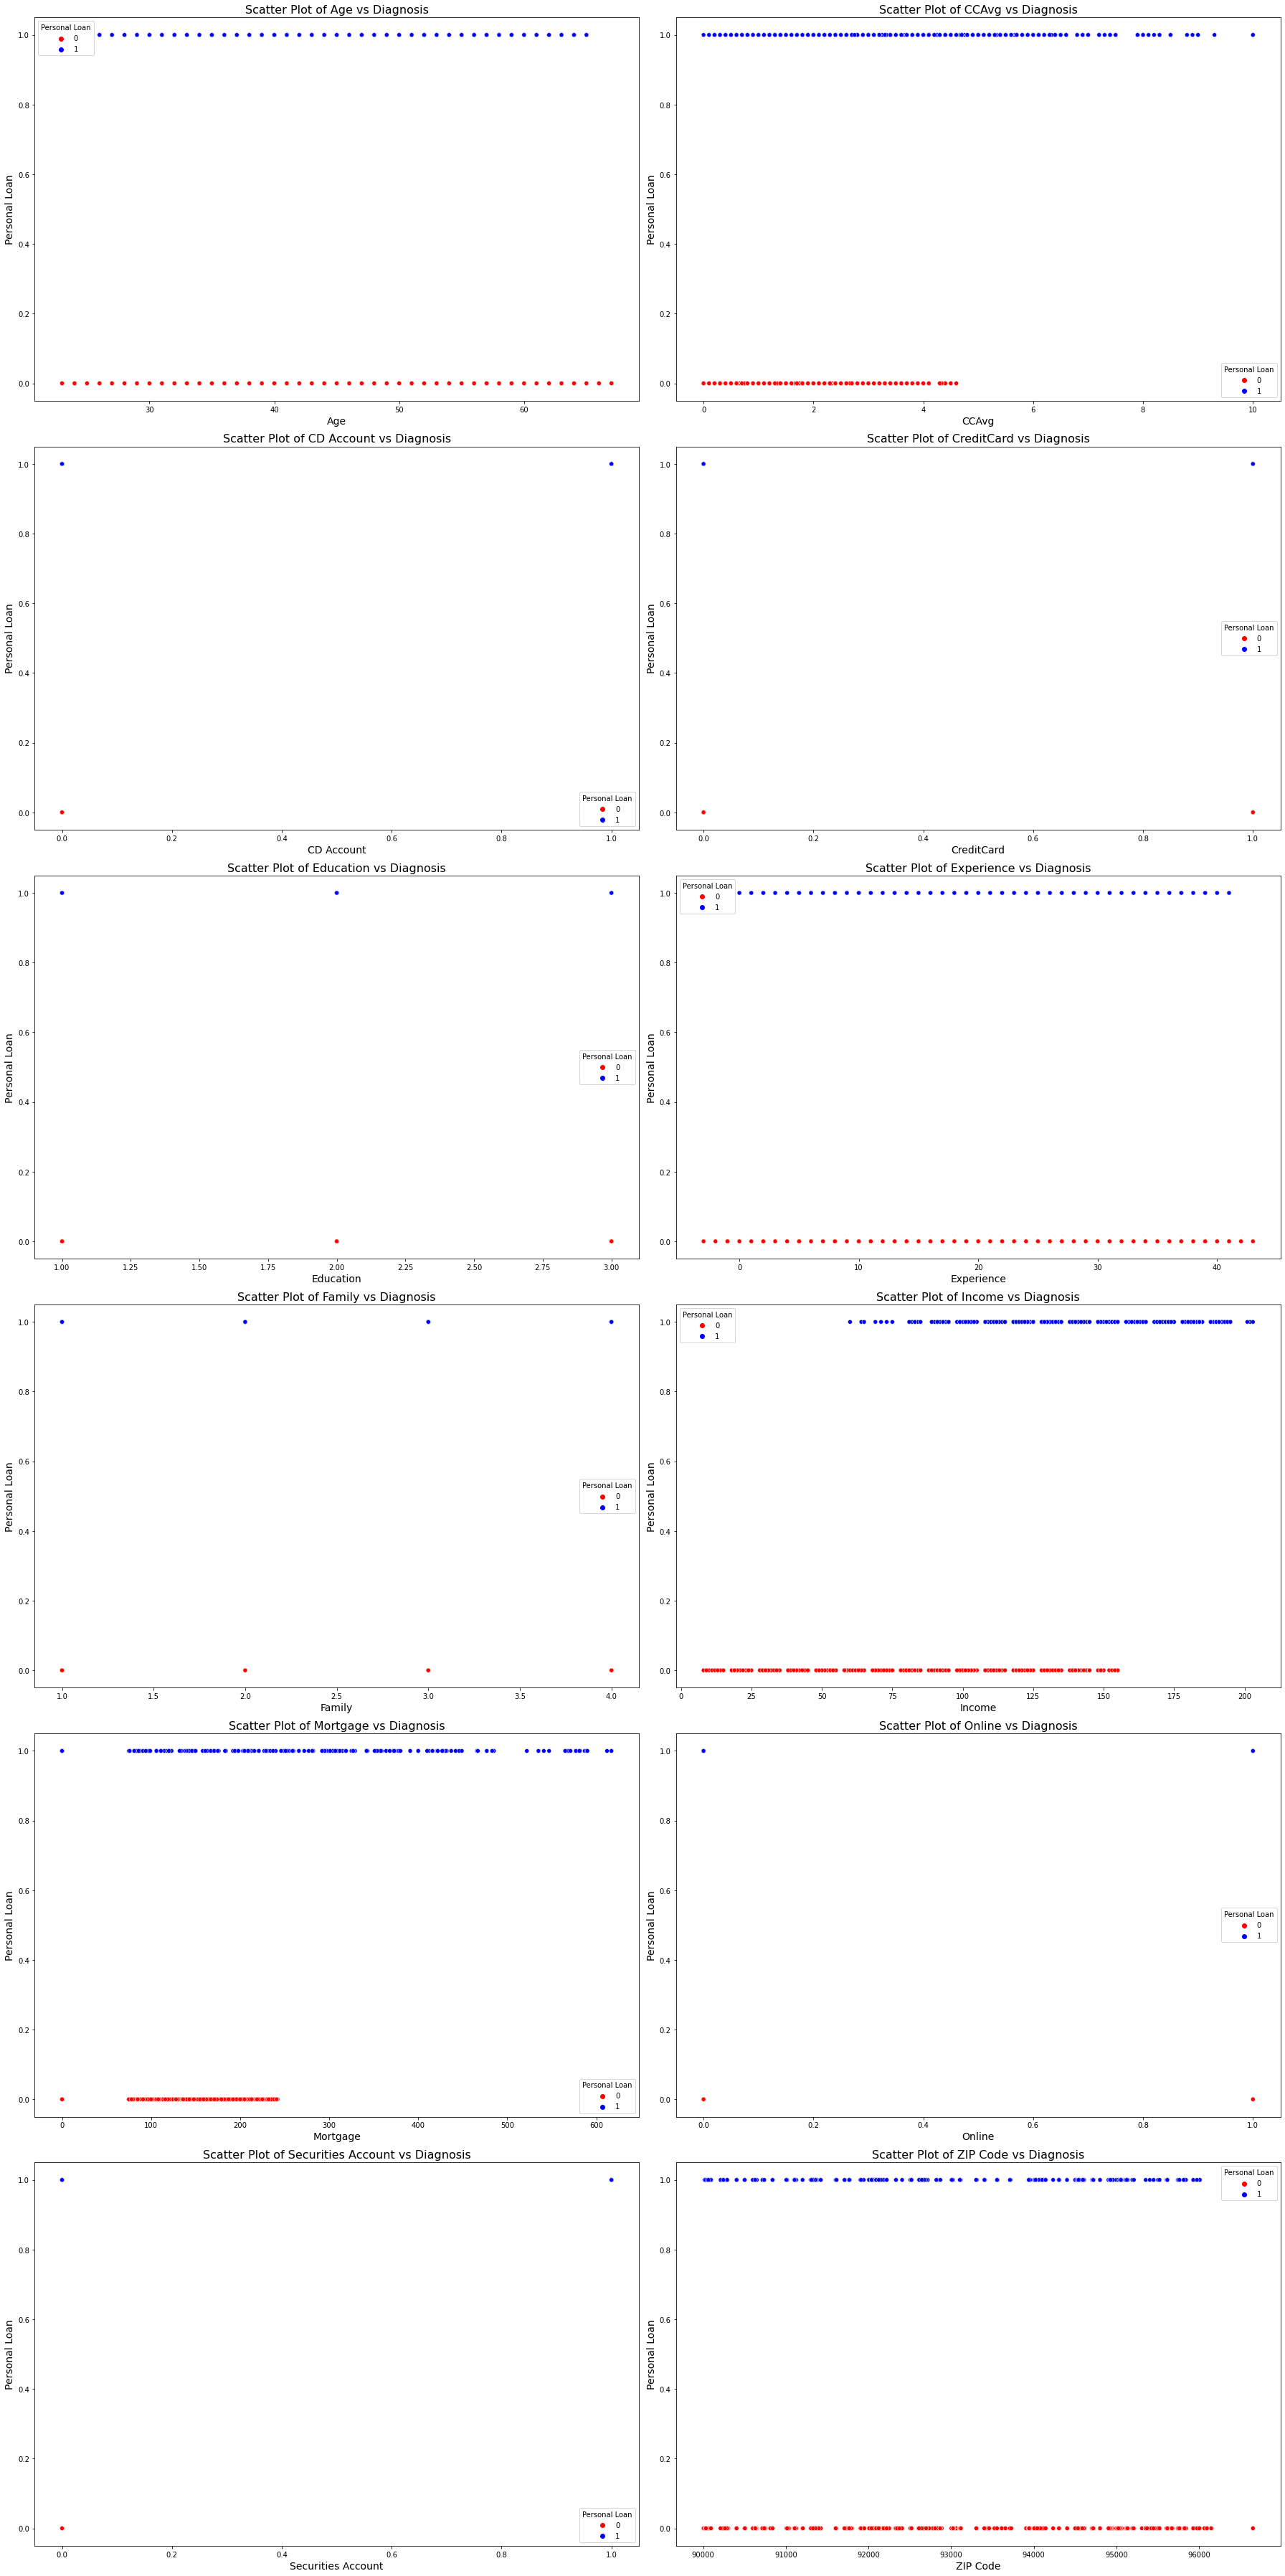

In [66]:
# Plotting scatter plots for all numeric features against the Personal Loan
plt.figure(figsize=(25, 50))
numeric_features = df.select_dtypes(include='number').columns.difference(["Personal Loan"])

for i, feature in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i)
    sns.scatterplot(data=df, x=feature, y="Personal Loan", hue="Personal Loan", palette={0: "red", 1: "blue"})
    plt.title(f'Scatter Plot of {feature} vs Diagnosis', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Personal Loan', fontsize=14)

plt.tight_layout()
plt.show()

## Cleaned Class Distribution 

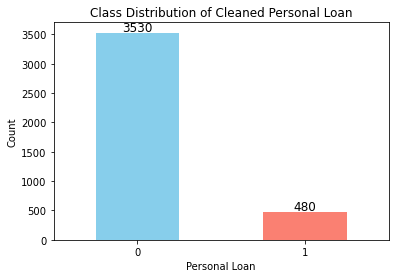

In [67]:
# Plot the value counts for 'Personal Loan'
ax = df['Personal Loan'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Display value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Class Distribution of Cleaned Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()

## Feature Relationship 

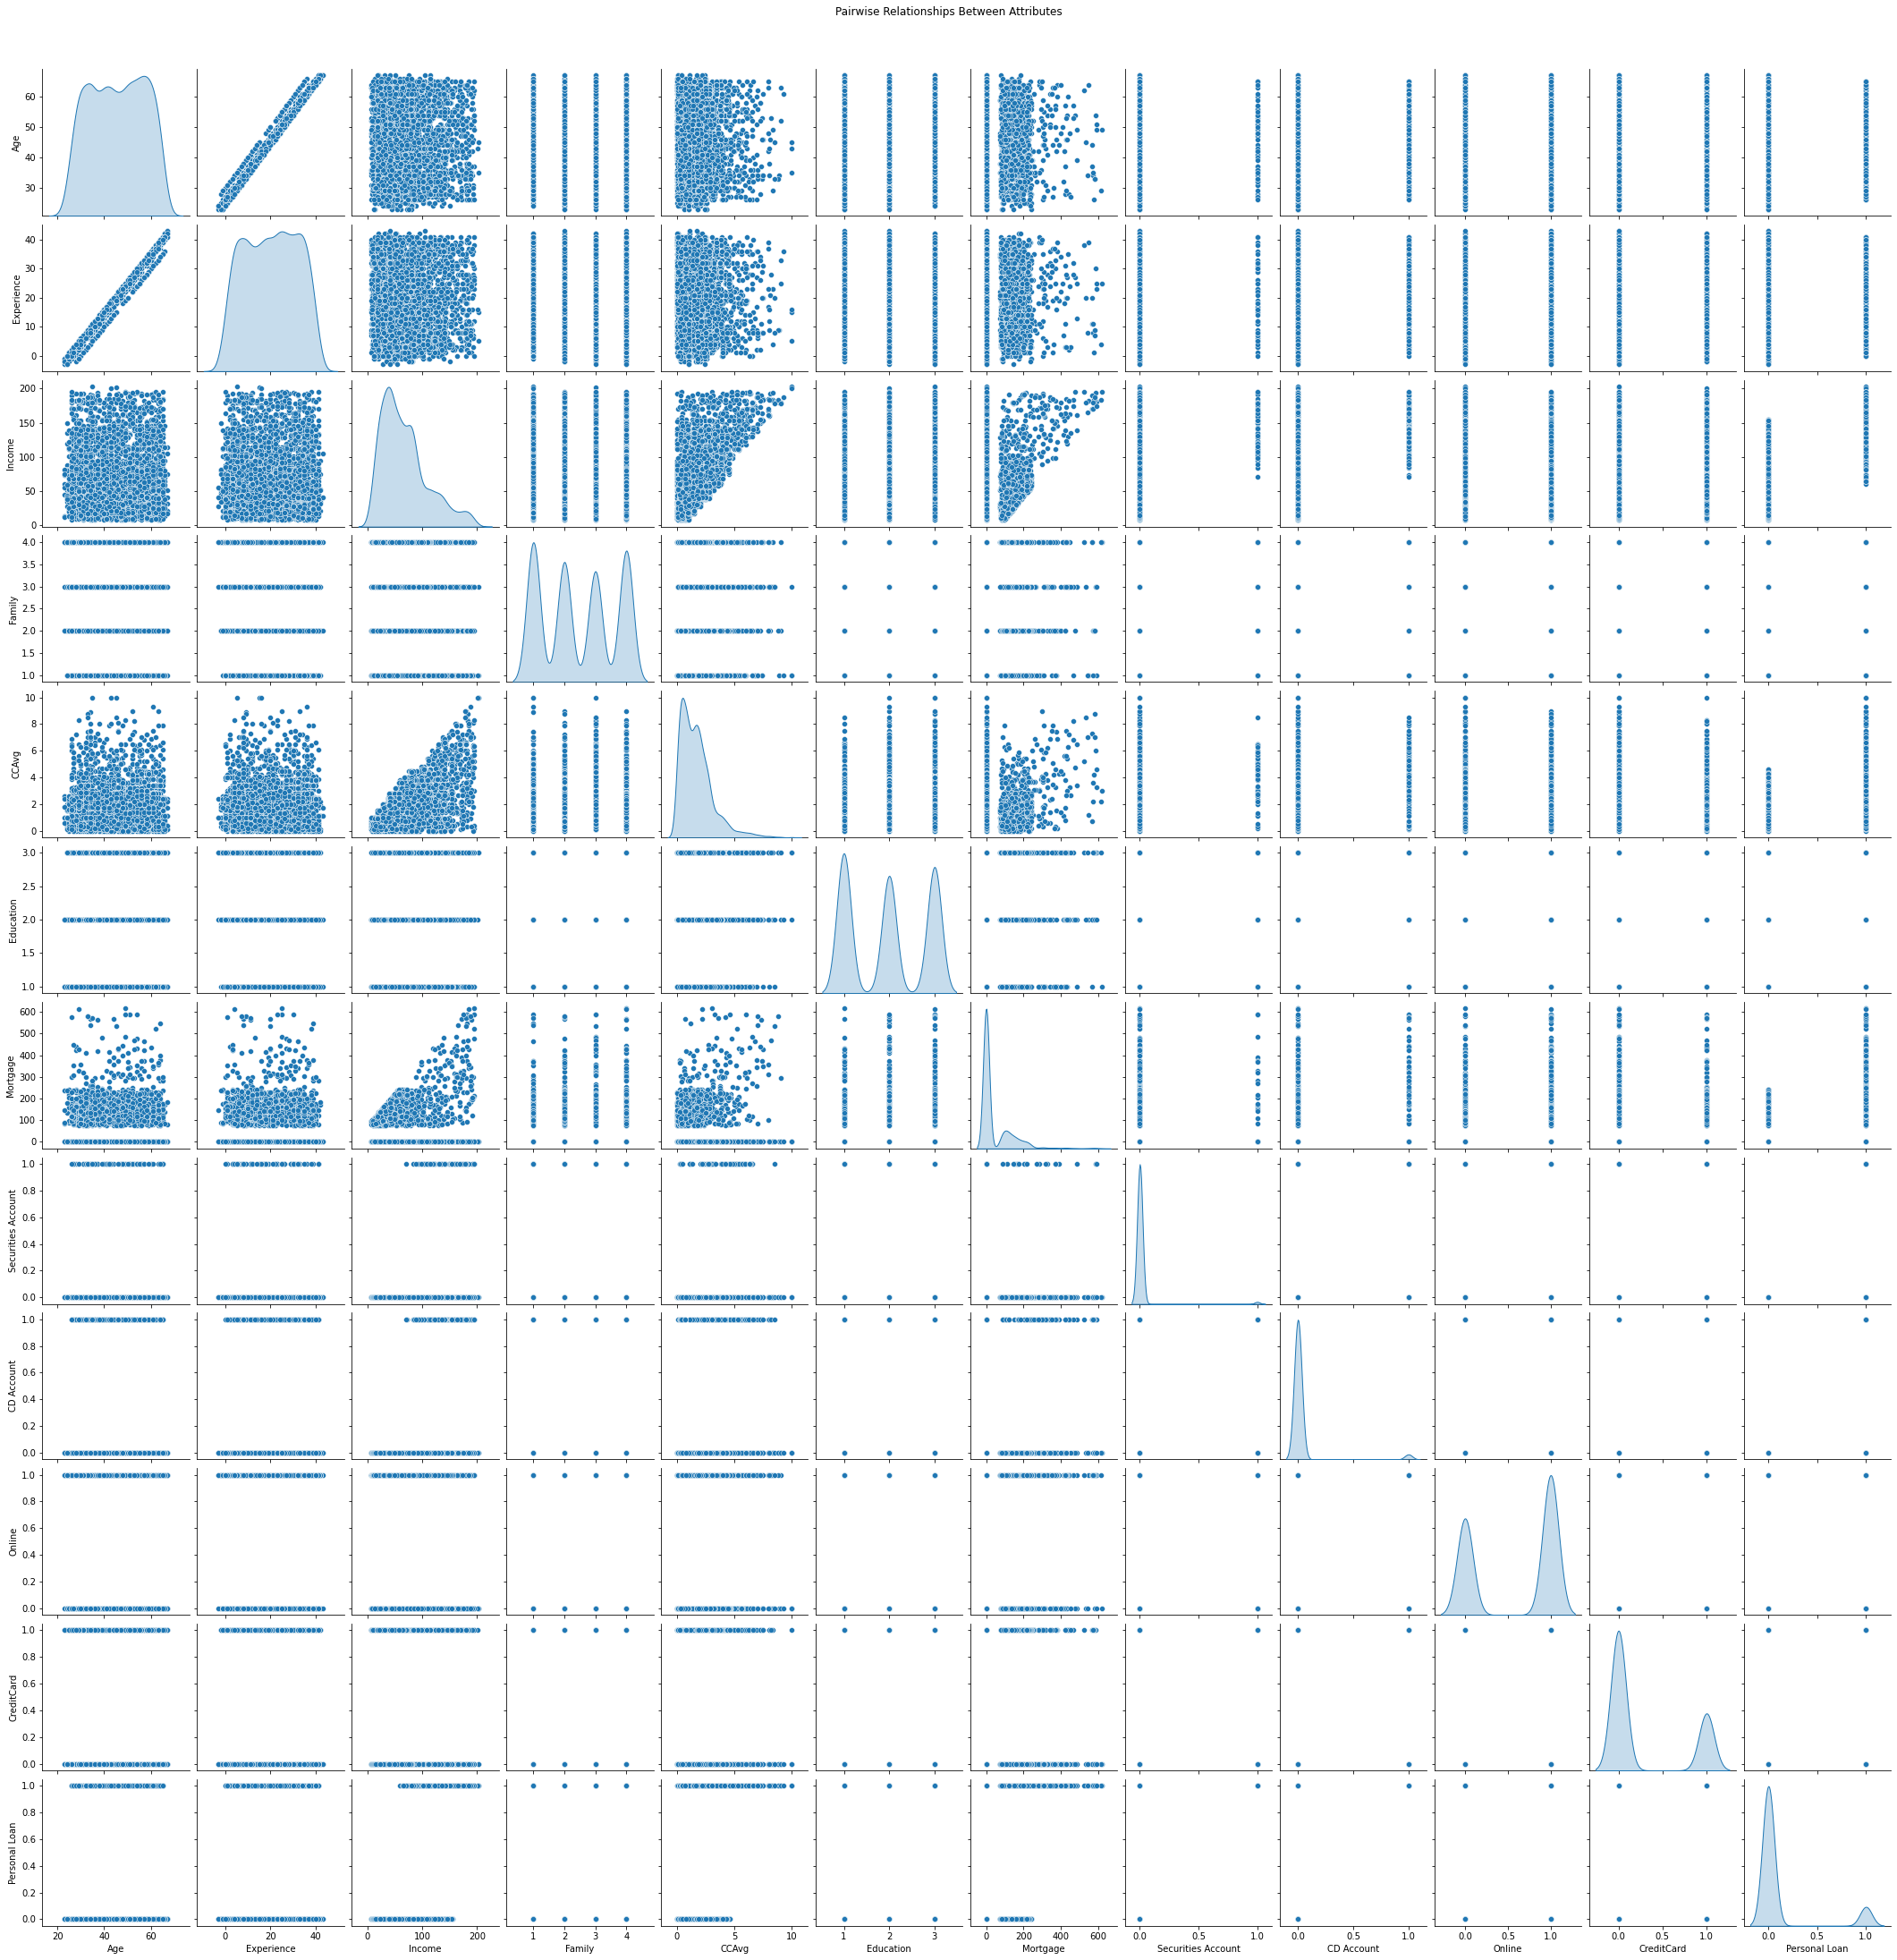

In [74]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

## Correlation

### Correlation Matrix

In [73]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.994090,-0.045226,-0.054232,-0.029452,0.035189,-0.002906,-0.006933,0.009535,0.018692,0.007261,-0.012228
Experience,0.994090,1.000000,-0.041252,-0.058756,-0.036069,0.008480,-0.002437,-0.005400,0.011922,0.018121,0.008060,-0.011039
Income,-0.045226,-0.041252,1.000000,-0.050237,0.614019,-0.042035,0.163435,0.211502,0.361767,0.020787,0.008119,0.671474
Family,-0.054232,-0.058756,-0.050237,1.000000,0.010229,-0.003729,0.042910,-0.017755,0.023271,0.019999,0.019267,0.046831
CCAvg,-0.029452,-0.036069,0.614019,0.010229,1.000000,0.036125,0.134366,0.198375,0.309586,-0.002562,0.009431,0.568839
Education,0.035189,0.008480,-0.042035,-0.003729,0.036125,1.000000,0.022188,0.027492,0.042427,-0.013661,-0.022166,0.119176
Mortgage,-0.002906,-0.002437,0.163435,0.042910,0.134366,0.022188,1.000000,0.069947,0.170973,-0.008975,0.012747,0.240063
Securities Account,-0.006933,-0.005400,0.211502,-0.017755,0.198375,0.027492,0.069947,1.000000,0.547276,0.023020,-0.001750,0.334229
CD Account,0.009535,0.011922,0.361767,0.023271,0.309586,0.042427,0.170973,0.547276,1.000000,0.119361,0.157016,0.515793
Online,0.018692,0.018121,0.020787,0.019999,-0.002562,-0.013661,-0.008975,0.023020,0.119361,1.000000,-0.019400,0.011049


### Correlation Heatmap

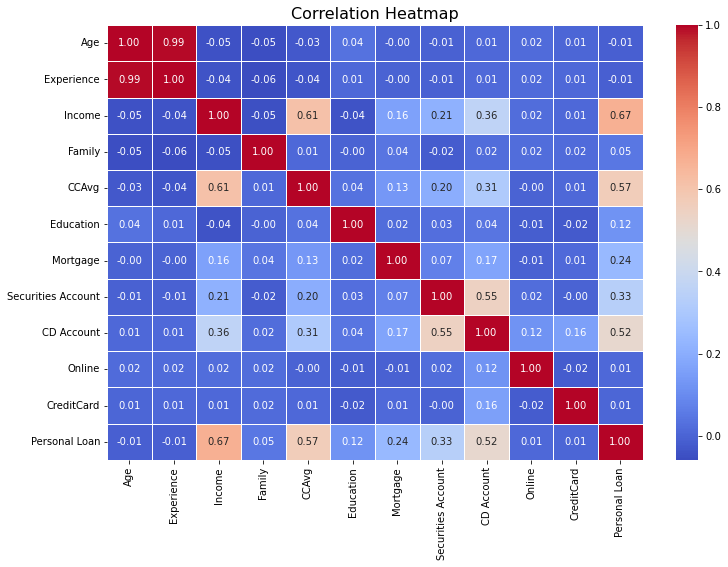

In [76]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Feature Correlation By Ranking

In [78]:
correlation_with_success = correlation_matrix['Personal Loan']

# Sort the correlation values in descending order
correlation_ranked = correlation_with_success.sort_values(ascending=False)

# Print the ranked correlation values
print(correlation_ranked)

Personal Loan         1.000000
Income                0.671474
CCAvg                 0.568839
CD Account            0.515793
Securities Account    0.334229
Mortgage              0.240063
Education             0.119176
Family                0.046831
Online                0.011049
CreditCard            0.006617
Experience           -0.011039
Age                  -0.012228
Name: Personal Loan, dtype: float64


## Feature Importance

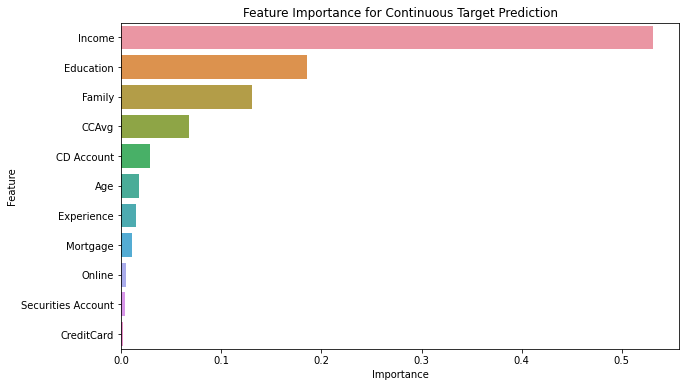

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df.drop(columns=[df.columns[-1]])  # Drop the last column (target)
y = df[df.columns[-1]]  # Select the last column (target

# Train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Continuous Target Prediction')
plt.show()

In [82]:
# Get the top 5 features
df_top5_importance = feature_importance_df.head(5)

# Create a new DataFrame with only the top 5 features and the target
df_top5_importance = X[df_top5_importance['Feature']].copy()
df_top5_importance['Personal Loan'] = y  # Add the target column

df_top5_importance

,Income,Education,Family,CCAvg,CD Account,Personal Loan
0,180,3,1,8.9,0,1
1,130,3,4,4.7,0,1
2,193,3,2,8.1,0,1
3,119,2,1,3.3,1,1
4,141,3,3,5.0,1,1
...,...,...,...,...,...,...
4005,40,3,1,1.9,0,0
4006,15,1,4,0.4,0,0
4007,24,3,2,0.3,0,0
4008,49,2,3,0.5,0,0


## Feature Selection RFE

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

# Create the model
model = LogisticRegression() 

# Create the RFE model and select the top 5 features 
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Print the features selected by RFE
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Print the ranking of all features
print(f"Feature Ranking: {rfe.ranking_}")

Selected Features: Index(['CCAvg', 'Education', 'Securities Account', 'CD Account', 'CreditCard'], dtype='object')
Feature Ranking: [3 4 6 5 1 1 7 1 1 2 1]


C:\Users\amiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [85]:
# Retain only the selected features in the DataFrame
df_rfe = df[selected_features]

# Optionally, you can add the target column ('Air Quality') back to df_selected
df_rfe['Personal Loan'] = y

df_rfe

C:\Users\amiru\AppData\Local\Temp\ipykernel_19744\4062375753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfe['Personal Loan'] = y


,CCAvg,Education,Securities Account,CD Account,CreditCard,Personal Loan
0,8.9,3,0,0,0,1
1,4.7,3,0,0,0,1
2,8.1,3,0,0,0,1
3,3.3,2,0,1,1,1
4,5.0,3,1,1,0,1
...,...,...,...,...,...,...
4005,1.9,3,0,0,0,0
4006,0.4,1,0,0,0,0
4007,0.3,3,0,0,0,0
4008,0.5,2,0,0,0,0


# Data Preparation

## Data Cleaning

### Drop Zip Code

In [68]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,34,9,180,93023,1,8.9,3,0,0,0,0,0,1
1,38,14,130,95010,4,4.7,3,134,0,0,0,0,1
2,46,21,193,91604,2,8.1,3,0,0,0,0,0,1
3,38,13,119,94104,1,3.3,2,0,0,1,1,1,1
4,42,18,141,94114,3,5.0,3,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4006,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4007,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4008,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [69]:
df = df.drop(columns = "ZIP Code")
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,34,9,180,1,8.9,3,0,0,0,0,0,1
1,38,14,130,4,4.7,3,134,0,0,0,0,1
2,46,21,193,2,8.1,3,0,0,0,0,0,1
3,38,13,119,1,3.3,2,0,0,1,1,1,1
4,42,18,141,3,5.0,3,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4005,29,3,40,1,1.9,3,0,0,0,1,0,0
4006,30,4,15,4,0.4,1,85,0,0,1,0,0
4007,63,39,24,2,0.3,3,0,0,0,0,0,0
4008,65,40,49,3,0.5,2,0,0,0,1,0,0


## Measurement of Skewness

In [70]:
skewness_values = df.skew()

# Display features with positive skewness values above 1
strongly_pos_skewed = skewness_values[skewness_values > 1]
print(strongly_pos_skewed)

CCAvg                 1.641797
Mortgage              2.454518
Securities Account    7.993517
CD Account            5.069345
Personal Loan         2.343983
dtype: float64


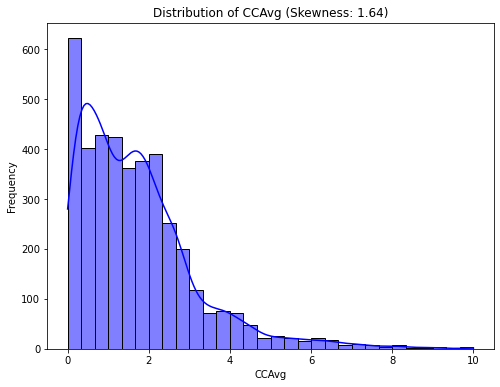

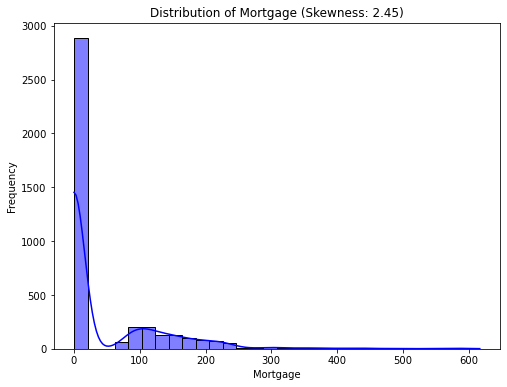

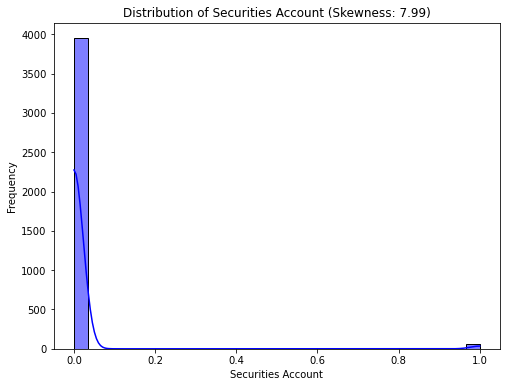

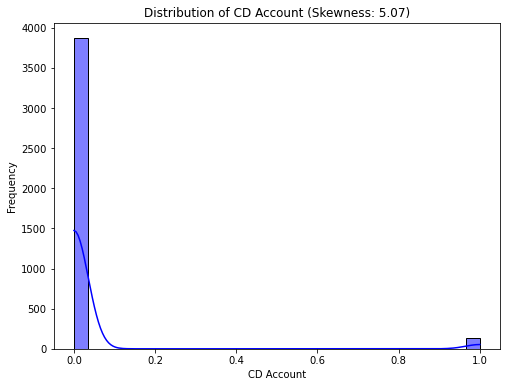

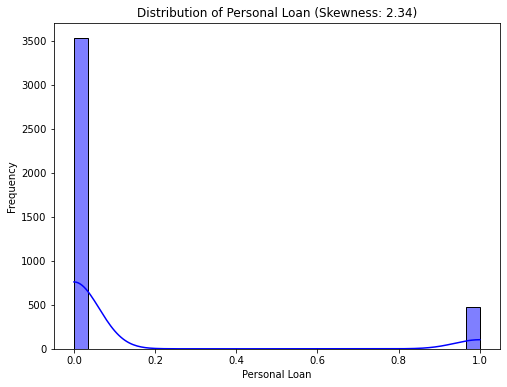

In [71]:
# Plotting the distributions for these strongly positively skewed features
for feature in strongly_pos_skewed.index:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature} (Skewness: {skewness_values[feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Log Scaling for Baseline Data

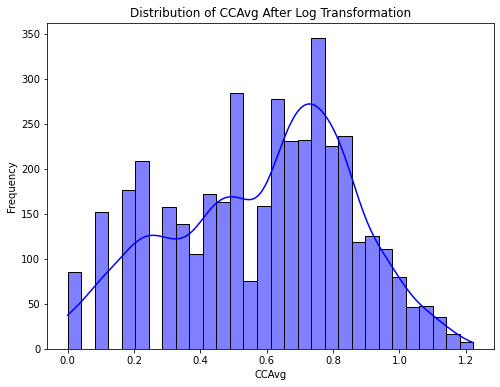

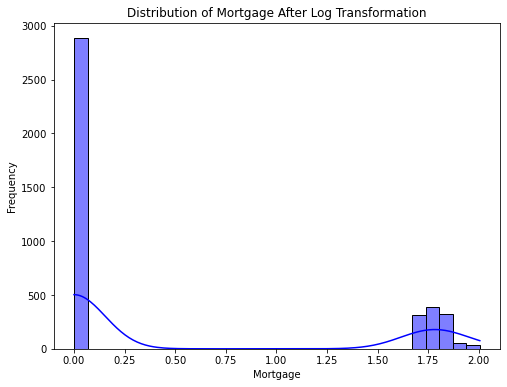

In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features to apply log transformation
features_to_transform = ['CCAvg', 'Mortgage']

# Log scale transformation for the selected features
for feature in features_to_transform:
    # Apply log transformation, adding 1 to avoid log(0) if needed
    df[feature] = np.log(df[feature] + 1)
    
    # Plotting the distributions after log transformation
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature} After Log Transformation')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Log Scaling for Top 5 Feature Importance Data

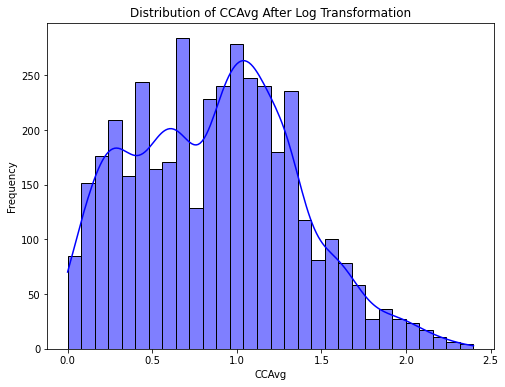

In [88]:
features_to_transform = ['CCAvg', 'Mortgage']

# Log scale transformation for the selected features
for feature in features_to_transform:
    if feature in df_top5_importance.columns:
        # Apply log transformation, adding 1 to avoid log(0) if needed
        df_top5_importance[feature] = np.log(df_top5_importance[feature] + 1)
        
        # Plotting the distributions after log transformation
        plt.figure(figsize=(8, 6))
        sns.histplot(df_top5_importance[feature], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {feature} After Log Transformation')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

## Log Scaling for RFE Data

C:\Users\amiru\AppData\Local\Temp\ipykernel_19744\1717277580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfe[feature] = np.log(df_rfe[feature] + 1)


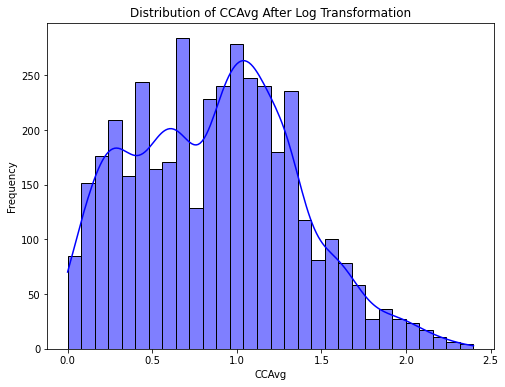

In [90]:
# Specify the features to apply log transformation
features_to_transform = ['CCAvg', 'Mortgage']

# Log scale transformation for the selected features
for feature in features_to_transform:
    if feature in df_rfe.columns:
        # Apply log transformation, adding 1 to avoid log(0) if needed
        df_rfe[feature] = np.log(df_rfe[feature] + 1)
        
        # Plotting the distributions after log transformation
        plt.figure(figsize=(8, 6))
        sns.histplot(df_rfe[feature], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {feature} After Log Transformation')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

## Reverify Log Scaled Data in DataFrame

In [91]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,34,9,180,1,1.191658,3,0.000000,0.000000,0.000000,0,0,0.693147
1,38,14,130,4,1.008128,3,1.775846,0.000000,0.000000,0,0,0.693147
2,46,21,193,2,1.165733,3,0.000000,0.000000,0.000000,0,0,0.693147
3,38,13,119,1,0.899598,2,0.000000,0.000000,0.693147,1,1,0.693147
4,42,18,141,3,1.026672,3,0.000000,0.693147,0.693147,1,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
4005,29,3,40,1,0.724990,3,0.000000,0.000000,0.000000,1,0,0.000000
4006,30,4,15,4,0.290033,1,1.696413,0.000000,0.000000,1,0,0.000000
4007,63,39,24,2,0.232986,3,0.000000,0.000000,0.000000,0,0,0.000000
4008,65,40,49,3,0.340368,2,0.000000,0.000000,0.000000,1,0,0.000000


In [92]:
df_top5_importance

,Income,Education,Family,CCAvg,CD Account,Personal Loan
0,180,3,1,2.292535,0,1
1,130,3,4,1.740466,0,1
2,193,3,2,2.208274,0,1
3,119,2,1,1.458615,1,1
4,141,3,3,1.791759,1,1
...,...,...,...,...,...,...
4005,40,3,1,1.064711,0,0
4006,15,1,4,0.336472,0,0
4007,24,3,2,0.262364,0,0
4008,49,2,3,0.405465,0,0


In [93]:
df_rfe

,CCAvg,Education,Securities Account,CD Account,CreditCard,Personal Loan
0,2.292535,3,0,0,0,1
1,1.740466,3,0,0,0,1
2,2.208274,3,0,0,0,1
3,1.458615,2,0,1,1,1
4,1.791759,3,1,1,0,1
...,...,...,...,...,...,...
4005,1.064711,3,0,0,0,0
4006,0.336472,1,0,0,0,0
4007,0.262364,3,0,0,0,0
4008,0.405465,2,0,0,0,0


## Min-Max Scaling

### Rescaled Baseline Data

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX[0:5, :])

[[0.25       0.26086957 0.88205128 0.         0.97424819 1.
  0.         0.         0.         0.         0.        ]
 [0.34090909 0.36956522 0.62564103 1.         0.82420221 1.
  0.88568525 0.         0.         0.         0.        ]
 [0.52272727 0.52173913 0.94871795 0.33333333 0.95305344 1.
  0.         0.         0.         0.         0.        ]
 [0.34090909 0.34782609 0.56923077 0.         0.73547286 0.5
  0.         0.         1.         1.         1.        ]
 [0.43181818 0.45652174 0.68205128 0.66666667 0.83936298 1.
  0.         1.         1.         1.         0.        ]]


### Rescaled Top 5 Feature Importance Data

In [95]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df_top5_importance.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX_top5 = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX_top5[0:5, :])

[[0.88205128 1.         0.         0.95606125 0.        ]
 [0.62564103 1.         1.         0.72583077 0.        ]
 [0.94871795 1.         0.33333333 0.92092196 0.        ]
 [0.56923077 0.5        0.         0.60828971 1.        ]
 [0.68205128 1.         0.66666667 0.74722174 1.        ]]


### Rescaled RFE Data

In [97]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df_rfe.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX_rfe = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX_rfe[0:5, :])

[[0.95606125 1.         0.         0.         0.        ]
 [0.72583077 1.         0.         0.         0.        ]
 [0.92092196 1.         0.         0.         0.        ]
 [0.60828971 0.5        0.         1.         1.        ]
 [0.74722174 1.         1.         1.         0.        ]]


In [98]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

## Splitting to Train and Test Data

### Baseline Data

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Extract X (features) and y (target)
X = rescaledX
y = Y

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Top 5 Feature Importance Data

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split

array = df_top5_importance.values

# Extract X (features) and y (target)
X_top5 = rescaledX_top5
y_top5 = Y

# Split data into training and testing sets
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y_top5, test_size=0.3, random_state=42, stratify=y)

### RFE Data

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split

array = df_rfe.values

# Extract X (features) and y (target)
X_rfe = rescaledX_rfe
y_rfe = array[:, -1]  

# Split data into training and testing sets
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, test_size=0.3, random_state=42, stratify=y)

### Checking for Total Training and Test Data After Splitting

In [103]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 2807
Total test data of X: 1203

Total training data of Y: 2807
Total test data of Y: 1203


## Checking for Data Imbalance in Training Data

In [104]:
# Convert y_train to pandas Series if it is a NumPy array
y_train_series = pd.Series(y_train)

# Calculate the class distribution in the training data
class_dist_train = y_train_series.value_counts()
print("Class distribution in training data:")
print(class_dist_train)
print()

# Calculate the percentage for each class in the training data
total_samples_train = class_dist_train.sum()
percentages_train = (class_dist_train / total_samples_train) * 100
print("Class Percentages in Training Data:")
print(percentages_train)

Class distribution in training data:
0.0    2471
1.0     336
dtype: int64

Class Percentages in Training Data:
0.0    88.029925
1.0    11.970075
dtype: float64


## SMOTE Oversampling for Minority Class

In [105]:
from imblearn.over_sampling import SMOTE

# Convert y_train_top5 and y_train_rfe to pandas Series for easier manipulation
y_train = pd.Series(y_train)
y_train_top5 = pd.Series(y_train_top5)
y_train_rfe = pd.Series(y_train_rfe)

# Display class distribution before oversampling
print('Before Oversampling for X_train:')
print(y_train.value_counts())
print()
print('Before Oversampling for X_train_top5:')
print(y_train_top5.value_counts())
print()
print('Before Oversampling for X_train_rfe:')
print(y_train_rfe.value_counts())

# Apply SMOTE for oversampling on the full training set
smote = SMOTE(random_state=42)

# Oversample X_train, y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Oversample X_train_top5, y_train_top5
X_train_top5_smote, y_train_top5_smote = smote.fit_resample(X_train_top5, y_train_top5)

# Oversample X_train_rfe, y_train_rfe
X_train_rfe_smote, y_train_rfe_smote = smote.fit_resample(X_train_rfe, y_train_rfe)

# Convert y_train_smote, y_train_top5_smote, and y_train_rfe_smote back to pandas Series
y_train_smote = pd.Series(y_train_smote)
y_train_top5_smote = pd.Series(y_train_top5_smote)
y_train_rfe_smote = pd.Series(y_train_rfe_smote)

# Display class distribution after oversampling
print('After Oversampling for X_train:')
print(y_train_smote.value_counts())
print()
print('After Oversampling for X_train_top5:')
print(y_train_top5_smote.value_counts())
print()
print('After Oversampling for X_train_rfe:')
print(y_train_rfe_smote.value_counts())

Before Oversampling for X_train:
0.0    2471
1.0     336
dtype: int64

Before Oversampling for X_train_top5:
0.0    2471
1.0     336
dtype: int64

Before Oversampling for X_train_rfe:
0.0    2471
1.0     336
dtype: int64
After Oversampling for X_train:
0.0    2471
1.0    2471
dtype: int64

After Oversampling for X_train_top5:
0.0    2471
1.0    2471
dtype: int64

After Oversampling for X_train_rfe:
0.0    2471
1.0    2471
dtype: int64


# Supervised Learning (Binary Classification)

## Train, Test and Evaluate Models

### Baseline Data

Logistic Regression: Accuracy: 0.948
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1059
         1.0       0.72      0.93      0.81       144

    accuracy                           0.95      1203
   macro avg       0.85      0.94      0.89      1203
weighted avg       0.96      0.95      0.95      1203




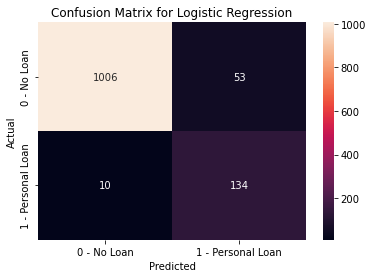

KNN: Accuracy: 0.962
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1059
         1.0       0.82      0.88      0.85       144

    accuracy                           0.96      1203
   macro avg       0.90      0.92      0.91      1203
weighted avg       0.96      0.96      0.96      1203




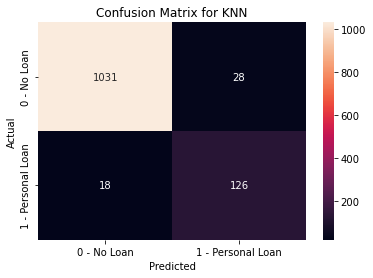

Decision Tree: Accuracy: 0.983
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1059
         1.0       0.90      0.97      0.93       144

    accuracy                           0.98      1203
   macro avg       0.95      0.98      0.96      1203
weighted avg       0.98      0.98      0.98      1203




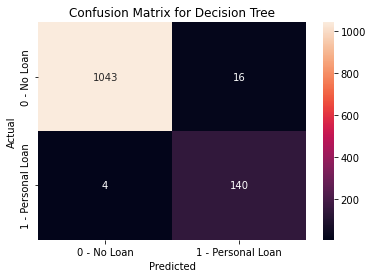

Naive Bayes: Accuracy: 0.919
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1059
         1.0       1.00      0.33      0.49       144

    accuracy                           0.92      1203
   macro avg       0.96      0.66      0.72      1203
weighted avg       0.93      0.92      0.90      1203




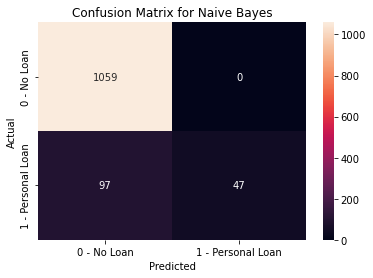

Support Vector Machine: Accuracy: 0.975
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1059
         1.0       0.87      0.94      0.90       144

    accuracy                           0.98      1203
   macro avg       0.93      0.96      0.94      1203
weighted avg       0.98      0.98      0.98      1203




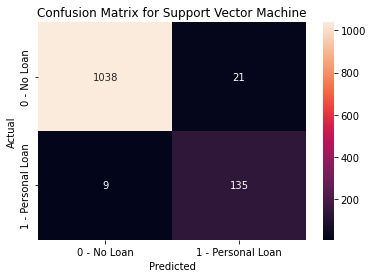

GBM: Accuracy: 0.982
Classification Report for GBM:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1059
         1.0       0.89      0.97      0.93       144

    accuracy                           0.98      1203
   macro avg       0.94      0.97      0.96      1203
weighted avg       0.98      0.98      0.98      1203




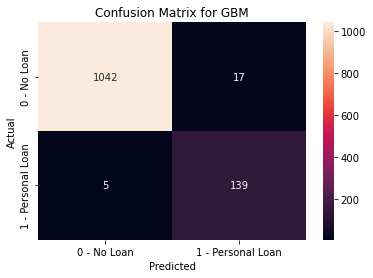

XGBoost: Accuracy: 0.986
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1059
         1.0       0.92      0.97      0.94       144

    accuracy                           0.99      1203
   macro avg       0.96      0.98      0.97      1203
weighted avg       0.99      0.99      0.99      1203




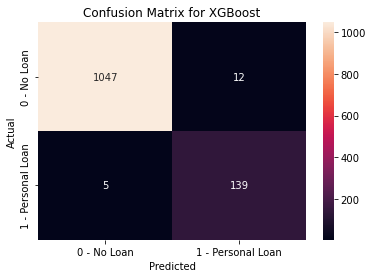

MLP: Accuracy: 0.972
Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1059
         1.0       0.86      0.92      0.89       144

    accuracy                           0.97      1203
   macro avg       0.92      0.95      0.93      1203
weighted avg       0.97      0.97      0.97      1203




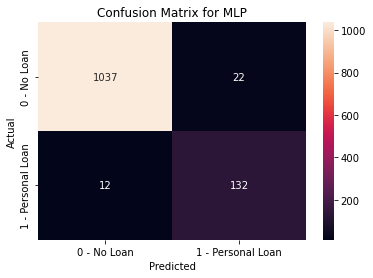

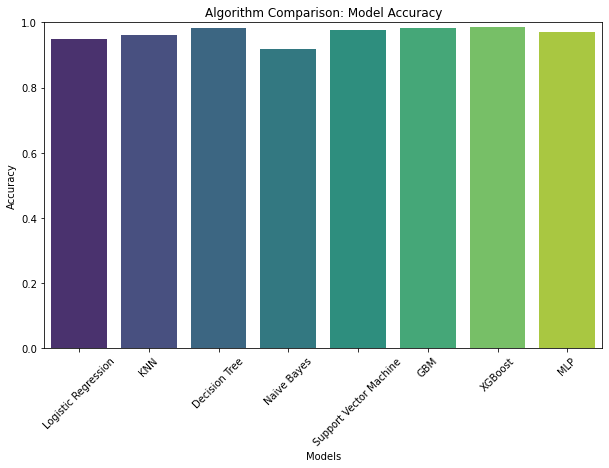

In [106]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Prepare models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('GBM', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]

# Prepare lists to store results and names
results = []
names = []

# Evaluate each model in turn
for name, model in models:
    # Train the model using training data (SMOTE for handling imbalance)
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy score
    accuracy = model.score(X_test, y_test)
    results.append(accuracy)
    names.append(name)
    print(f"{name}: Accuracy: {accuracy:.3f}")
    
    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", 
                xticklabels=['0 - No Loan', '1 - Personal Loan'], 
                yticklabels=['0 - No Loan', '1 - Personal Loan'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Bar plot for algorithm comparison (accuracies of models)
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=results, palette='viridis')
plt.title('Algorithm Comparison: Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

## Top 5 Feature Importance Data

Logistic Regression: Accuracy: 0.948
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1059
         1.0       0.71      0.94      0.81       144

    accuracy                           0.95      1203
   macro avg       0.85      0.95      0.89      1203
weighted avg       0.96      0.95      0.95      1203




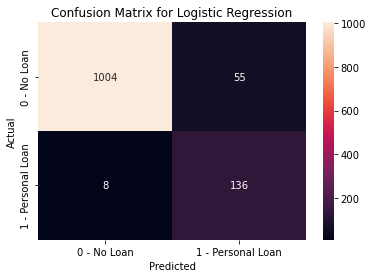

KNN: Accuracy: 0.982
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1059
         1.0       0.91      0.94      0.92       144

    accuracy                           0.98      1203
   macro avg       0.95      0.96      0.96      1203
weighted avg       0.98      0.98      0.98      1203




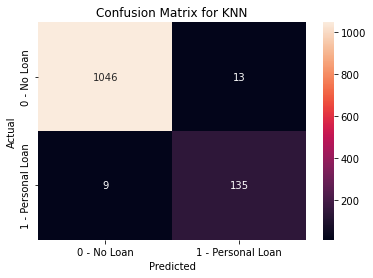

Decision Tree: Accuracy: 0.984
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1059
         1.0       0.91      0.96      0.94       144

    accuracy                           0.98      1203
   macro avg       0.95      0.97      0.96      1203
weighted avg       0.98      0.98      0.98      1203




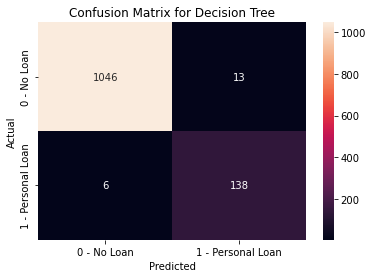

Naive Bayes: Accuracy: 0.926
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1059
         1.0       1.00      0.38      0.55       144

    accuracy                           0.93      1203
   macro avg       0.96      0.69      0.76      1203
weighted avg       0.93      0.93      0.91      1203




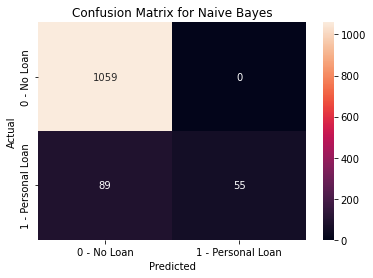

Support Vector Machine: Accuracy: 0.976
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1059
         1.0       0.86      0.96      0.90       144

    accuracy                           0.98      1203
   macro avg       0.93      0.97      0.95      1203
weighted avg       0.98      0.98      0.98      1203




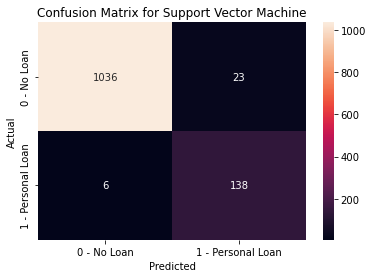

GBM: Accuracy: 0.981
Classification Report for GBM:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1059
         1.0       0.89      0.97      0.92       144

    accuracy                           0.98      1203
   macro avg       0.94      0.97      0.96      1203
weighted avg       0.98      0.98      0.98      1203




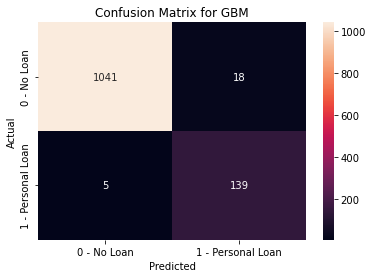

XGBoost: Accuracy: 0.984
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1059
         1.0       0.92      0.95      0.94       144

    accuracy                           0.98      1203
   macro avg       0.96      0.97      0.96      1203
weighted avg       0.98      0.98      0.98      1203




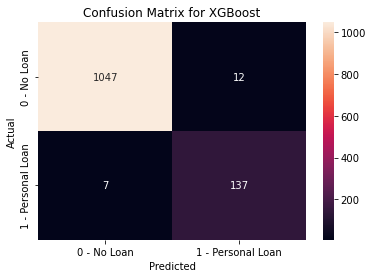

MLP: Accuracy: 0.978
Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1059
         1.0       0.88      0.94      0.91       144

    accuracy                           0.98      1203
   macro avg       0.94      0.96      0.95      1203
weighted avg       0.98      0.98      0.98      1203




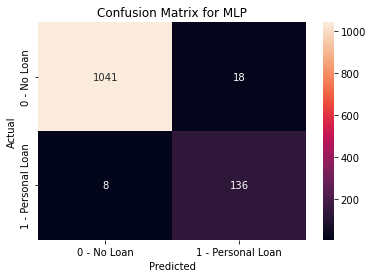

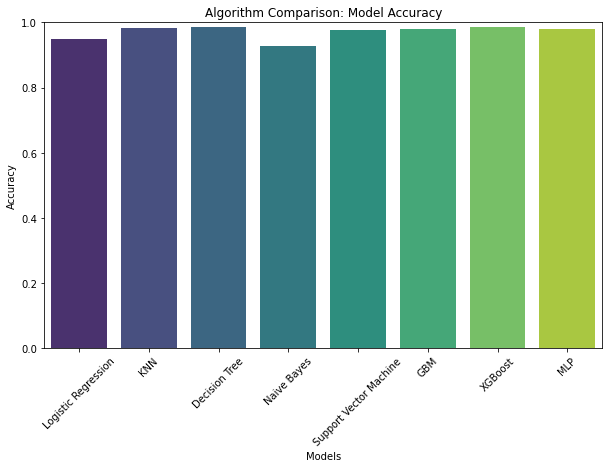

In [107]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Prepare models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('GBM', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]

# Prepare lists to store results and names
results = []
names = []

# Evaluate each model in turn
for name, model in models:
    # Train the model using training data (SMOTE for handling imbalance)
    model.fit(X_train_top5_smote, y_train_top5_smote)

    # Predict on the test set
    y_pred = model.predict(X_test_top5)

    # Accuracy score
    accuracy = model.score(X_test_top5, y_test_top5)
    results.append(accuracy)
    names.append(name)
    print(f"{name}: Accuracy: {accuracy:.3f}")
    
    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test_top5, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test_top5, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", 
                xticklabels=['0 - No Loan', '1 - Personal Loan'], 
                yticklabels=['0 - No Loan', '1 - Personal Loan'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Bar plot for algorithm comparison (accuracies of models)
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=results, palette='viridis')
plt.title('Algorithm Comparison: Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

### RFE Data

Logistic Regression: Accuracy: 0.941
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1059
         1.0       0.96      0.53      0.68       144

    accuracy                           0.94      1203
   macro avg       0.95      0.76      0.82      1203
weighted avg       0.94      0.94      0.93      1203




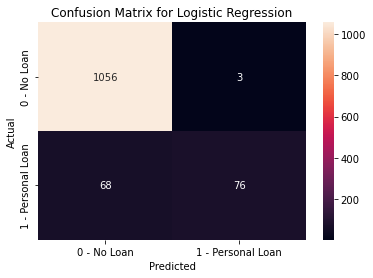

KNN: Accuracy: 0.948
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1059
         1.0       0.85      0.69      0.76       144

    accuracy                           0.95      1203
   macro avg       0.90      0.84      0.87      1203
weighted avg       0.95      0.95      0.95      1203




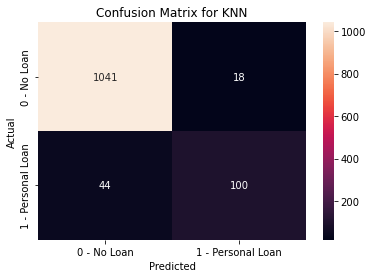

Decision Tree: Accuracy: 0.960
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1059
         1.0       0.94      0.72      0.81       144

    accuracy                           0.96      1203
   macro avg       0.95      0.85      0.89      1203
weighted avg       0.96      0.96      0.96      1203




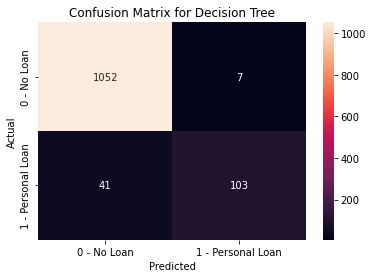

Naive Bayes: Accuracy: 0.919
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1059
         1.0       1.00      0.33      0.49       144

    accuracy                           0.92      1203
   macro avg       0.96      0.66      0.72      1203
weighted avg       0.93      0.92      0.90      1203




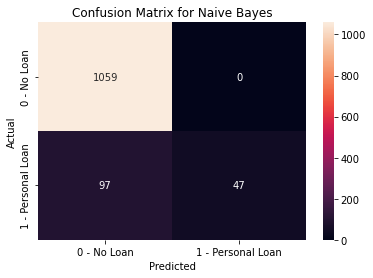

Support Vector Machine: Accuracy: 0.946
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1059
         1.0       0.93      0.59      0.72       144

    accuracy                           0.95      1203
   macro avg       0.94      0.79      0.85      1203
weighted avg       0.95      0.95      0.94      1203




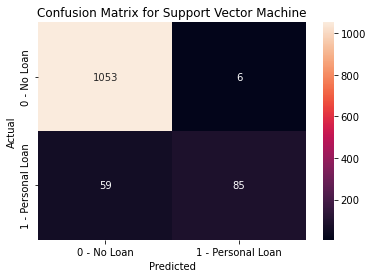

GBM: Accuracy: 0.960
Classification Report for GBM:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1059
         1.0       0.96      0.69      0.81       144

    accuracy                           0.96      1203
   macro avg       0.96      0.85      0.89      1203
weighted avg       0.96      0.96      0.96      1203




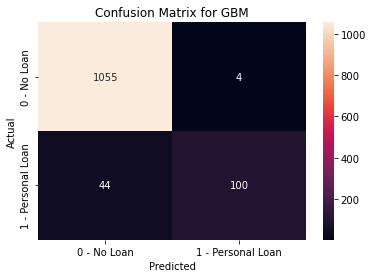

XGBoost: Accuracy: 0.960
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1059
         1.0       0.94      0.72      0.81       144

    accuracy                           0.96      1203
   macro avg       0.95      0.85      0.89      1203
weighted avg       0.96      0.96      0.96      1203




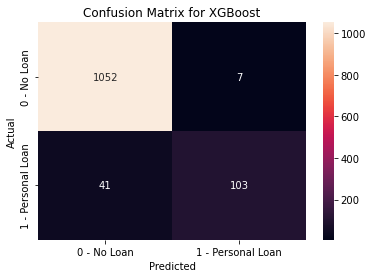

MLP: Accuracy: 0.954
Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1059
         1.0       0.90      0.69      0.78       144

    accuracy                           0.95      1203
   macro avg       0.93      0.84      0.88      1203
weighted avg       0.95      0.95      0.95      1203




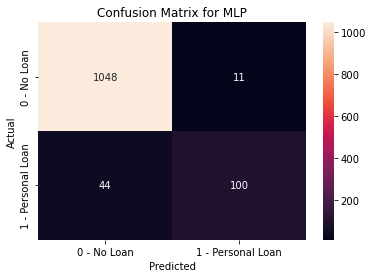

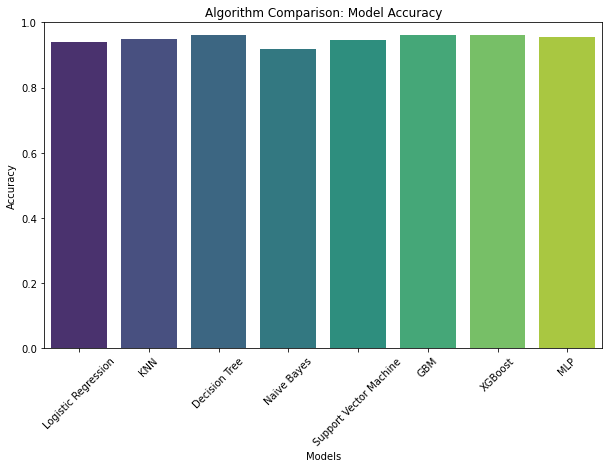

In [108]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Prepare models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('GBM', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]

# Prepare lists to store results and names
results = []
names = []

# Evaluate each model in turn
for name, model in models:
    # Train the model using training data (SMOTE for handling imbalance)
    model.fit(X_train_rfe, y_train_rfe)

    # Predict on the test set
    y_pred = model.predict(X_test_rfe)

    # Accuracy score
    accuracy = model.score(X_test_rfe, y_test_rfe)
    results.append(accuracy)
    names.append(name)
    print(f"{name}: Accuracy: {accuracy:.3f}")
    
    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test_rfe, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test_rfe, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", 
                xticklabels=['0 - No Loan', '1 - Personal Loan'], 
                yticklabels=['0 - No Loan', '1 - Personal Loan'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Bar plot for algorithm comparison (accuracies of models)
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=results, palette='viridis')
plt.title('Algorithm Comparison: Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

# Prediction Output

## Baseline

In [109]:
# Dictionary to store predictions for each model
test_predictions = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    test_predictions[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual'] = y_test

# Reorder the columns to put the 'Actual' value in the first column
predictions_df = predictions_df[['Actual'] + [col for col in predictions_df.columns if col != 'Actual']]

# Mapping to rename class labels
label_mapping = {0: 'No Loan', 1: 'Personal Loan'}

# Rename the values in the DataFrame using the mapping
predictions_df = predictions_df.replace(label_mapping)

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df

Table of Predictions:


,Actual,Logistic Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,GBM,XGBoost,MLP
0,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
2,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
3,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
4,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
...,...,...,...,...,...,...,...,...,...
1198,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1199,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1200,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1201,Personal Loan,Personal Loan,Personal Loan,Personal Loan,No Loan,Personal Loan,Personal Loan,Personal Loan,Personal Loan


## Top 5 Feature Importance Data

In [110]:
# Dictionary to store predictions for each model
test_predictions_top5 = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train_top5_smote, y_train_top5_smote)

    # Predict on the test set
    y_pred = model.predict(X_test_top5)

    # Store predictions in the dictionary
    test_predictions_top5[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df_top5 = pd.DataFrame(test_predictions_top5)

# Add the actual values for comparison
predictions_df_top5['Actual'] = y_test_top5

# Reorder the columns to put the 'Actual' value in the first column
predictions_df_top5 = predictions_df_top5[['Actual'] + [col for col in predictions_df_top5.columns if col != 'Actual']]

# Mapping to rename class labels
label_mapping = {0: 'No Loan', 1: 'Personal Loan'}

# Rename the values in the DataFrame using the mapping
predictions_df_top5 = predictions_df_top5.replace(label_mapping)

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df_top5

Table of Predictions:


,Actual,Logistic Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,GBM,XGBoost,MLP
0,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
2,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
3,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
4,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
...,...,...,...,...,...,...,...,...,...
1198,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1199,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1200,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1201,Personal Loan,Personal Loan,Personal Loan,Personal Loan,No Loan,Personal Loan,Personal Loan,Personal Loan,Personal Loan


## RFE Data

In [111]:
# Dictionary to store predictions for each model
test_predictions_rfe = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train_rfe, y_train_rfe)

    # Predict on the test set
    y_pred = model.predict(X_test_rfe)

    # Store predictions in the dictionary
    test_predictions_rfe[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df_rfe = pd.DataFrame(test_predictions_rfe)

# Add the actual values for comparison
predictions_df_rfe['Actual'] = y_test_rfe

# Reorder the columns to put the 'Actual' value in the first column
predictions_df_rfe = predictions_df_rfe[['Actual'] + [col for col in predictions_df_rfe.columns if col != 'Actual']]

# Mapping to rename class labels
label_mapping = {0: 'No Loan', 1: 'Personal Loan'}

# Rename the values in the DataFrame using the mapping
predictions_df_rfe = predictions_df_rfe.replace(label_mapping)

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df_rfe

Table of Predictions:


,Actual,Logistic Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,GBM,XGBoost,MLP
0,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
2,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
3,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
4,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
...,...,...,...,...,...,...,...,...,...
1198,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1199,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1200,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan
1201,Personal Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan


# The End of Notebook